In [3]:
install.packages("igraph")
 install.packages("network") 
 install.packages("sna")
 install.packages("ndtv")
install.packages("png")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘coda’, ‘statnet.common’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘networkDynamic’, ‘animation’, ‘base64’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
nodes <- read.csv("Dataset1-Media-Example-NODES.csv", header=T, as.is=T)
links <- read.csv("Dataset1-Media-Example-EDGES.csv", header=T, as.is=T)

In [5]:
head(nodes)
head(links)
nrow(nodes); length(unique(nodes$id))
nrow(links); nrow(unique(links[,c("from", "to")]))

id  media               media.type type.label audience.size
1 s01 NY Times            1          Newspaper  20           
2 s02 Washington Post     1          Newspaper  25           
3 s03 Wall Street Journal 1          Newspaper  30           
4 s04 USA Today           1          Newspaper  32           
5 s05 LA Times            1          Newspaper  20           
6 s06 New York Post       1          Newspaper  50

from to  weight type     
1 s01  s02 10     hyperlink
2 s01  s02 12     hyperlink
3 s01  s03 22     hyperlink
4 s01  s04 21     hyperlink
5 s04  s11 22     mention  
6 s05  s15 21     mention

[1] 17

[1] 17

[1] 52

[1] 49

In [6]:
links <- aggregate(links[,3], links[,-3], sum)
links <- links[order(links$from, links$to),]
colnames(links)[4] <- "weight"
rownames(links) <- NULL

In [7]:
nodes2 <- read.csv("Dataset2-Media-User-Example-NODES.csv", header=T, as.is=T)
links2 <- read.csv("Dataset2-Media-User-Example-EDGES.csv", header=T, row.names=1)

In [8]:
head(nodes2)
head(links2)

id  media   media.type media.name audience.size
1 s01 NYT     1          Newspaper  20           
2 s02 WaPo    1          Newspaper  25           
3 s03 WSJ     1          Newspaper  30           
4 s04 USAT    1          Newspaper  32           
5 s05 LATimes 1          Newspaper  20           
6 s06 CNN     2          TV         56

U01 U02 U03 U04 U05 U06 U07 U08 U09 U10 U11 U12 U13 U14 U15 U16 U17 U18 U19
s01 1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
s02 0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
s03 0   0   0   0   0   1   1   1   1   0   0   0   0   0   0   0   0   0   0  
s04 0   0   0   0   0   0   0   0   1   1   1   0   0   0   0   0   0   0   0  
s05 0   0   0   0   0   0   0   0   0   0   1   1   1   0   0   0   0   0   0  
s06 0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   1   0   0  
    U20
s01 0  
s02 1  
s03 0  
s04 0  
s05 0  
s06 0

In [9]:
links2 <- as.matrix(links2)
dim(links2)
dim(nodes2)

[1] 10 20

[1] 30  5

In [10]:
library(igraph)

net <- graph.data.frame(links, nodes, directed=T)
net


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



IGRAPH 524045a DNW- 17 49 -- 
+ attr: name (v/c), media (v/c), media.type (v/n), type.label (v/c),
| audience.size (v/n), type (e/c), weight (e/n)
+ edges from 524045a (vertex names):
 [1] s01->s02 s01->s03 s01->s04 s01->s15 s02->s01 s02->s03 s02->s09 s02->s10
 [9] s03->s01 s03->s04 s03->s05 s03->s08 s03->s10 s03->s11 s03->s12 s04->s03
[17] s04->s06 s04->s11 s04->s12 s04->s17 s05->s01 s05->s02 s05->s09 s05->s15
[25] s06->s06 s06->s16 s06->s17 s07->s03 s07->s08 s07->s10 s07->s14 s08->s03
[33] s08->s07 s08->s09 s09->s10 s10->s03 s12->s06 s12->s13 s12->s14 s13->s12
[41] s13->s17 s14->s11 s14->s13 s15->s01 s15->s04 s15->s06 s16->s06 s16->s17
[49] s17->s04

In [11]:
E(net)       # The edges of the "net" object
V(net)       # The vertices of the "net" object
E(net)$type  # Edge attribute "type"
V(net)$media # Vertex attribute "media"

# You can also manipulate the network matrix directly:
net[1,]
net[5,7]

+ 49/49 edges from 524045a (vertex names):
 [1] s01->s02 s01->s03 s01->s04 s01->s15 s02->s01 s02->s03 s02->s09 s02->s10
 [9] s03->s01 s03->s04 s03->s05 s03->s08 s03->s10 s03->s11 s03->s12 s04->s03
[17] s04->s06 s04->s11 s04->s12 s04->s17 s05->s01 s05->s02 s05->s09 s05->s15
[25] s06->s06 s06->s16 s06->s17 s07->s03 s07->s08 s07->s10 s07->s14 s08->s03
[33] s08->s07 s08->s09 s09->s10 s10->s03 s12->s06 s12->s13 s12->s14 s13->s12
[41] s13->s17 s14->s11 s14->s13 s15->s01 s15->s04 s15->s06 s16->s06 s16->s17
[49] s17->s04

+ 17/17 vertices, named, from 524045a:
 [1] s01 s02 s03 s04 s05 s06 s07 s08 s09 s10 s11 s12 s13 s14 s15 s16 s17

[1] "hyperlink" "hyperlink" "hyperlink" "mention"   "hyperlink" "hyperlink"
 [7] "hyperlink" "hyperlink" "hyperlink" "hyperlink" "hyperlink" "hyperlink"
[13] "mention"   "hyperlink" "hyperlink" "hyperlink" "mention"   "mention"  
[19] "hyperlink" "mention"   "mention"   "hyperlink" "hyperlink" "mention"  
[25] "hyperlink" "hyperlink" "mention"   "mention"   "mention"   "hyperlink"
[31] "mention"   "hyperlink" "mention"   "mention"   "mention"   "hyperlink"
[37] "mention"   "hyperlink" "mention"   "hyperlink" "mention"   "mention"  
[43] "mention"   "hyperlink" "hyperlink" "hyperlink" "hyperlink" "mention"  
[49] "hyperlink"

[1] "NY Times"            "Washington Post"     "Wall Street Journal"
 [4] "USA Today"           "LA Times"            "New York Post"      
 [7] "CNN"                 "MSNBC"               "FOX News"           
[10] "ABC"                 "BBC"                 "Yahoo News"         
[13] "Google News"         "Reuters.com"         "NYTimes.com"        
[16] "WashingtonPost.com"  "AOL.com"

s01 s02 s03 s04 s05 s06 s07 s08 s09 s10 s11 s12 s13 s14 s15 s16 s17 
  0  22  22  21   0   0   0   0   0   0   0   0   0   0  20   0   0

[1] 0

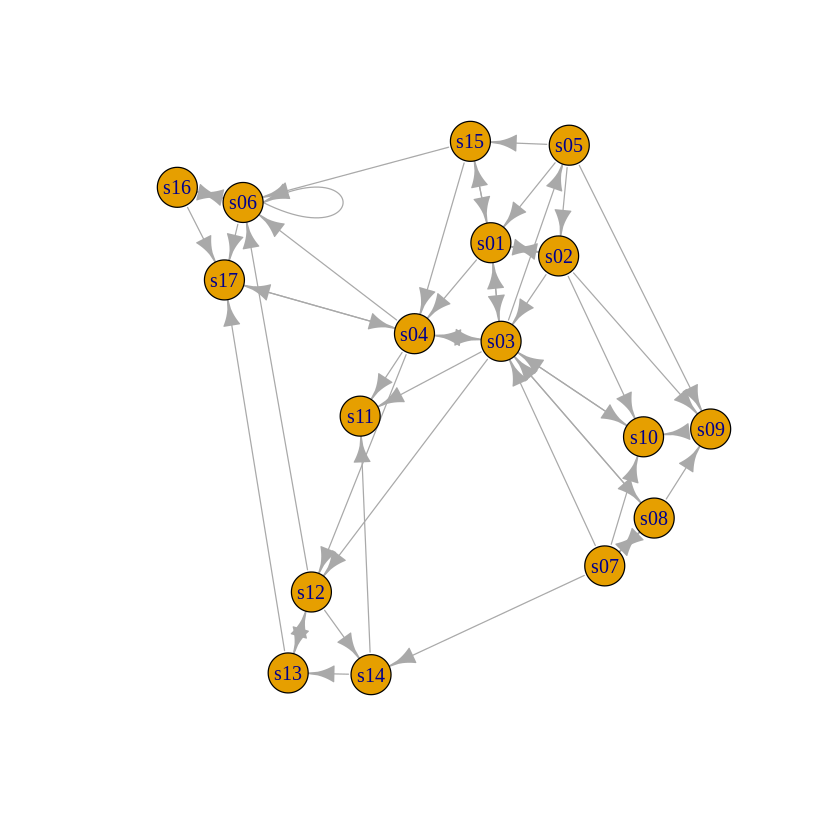

In [12]:
plot(net) # not a pretty picture!

In [13]:
net <- simplify(net, remove.multiple = F, remove.loops = T) 

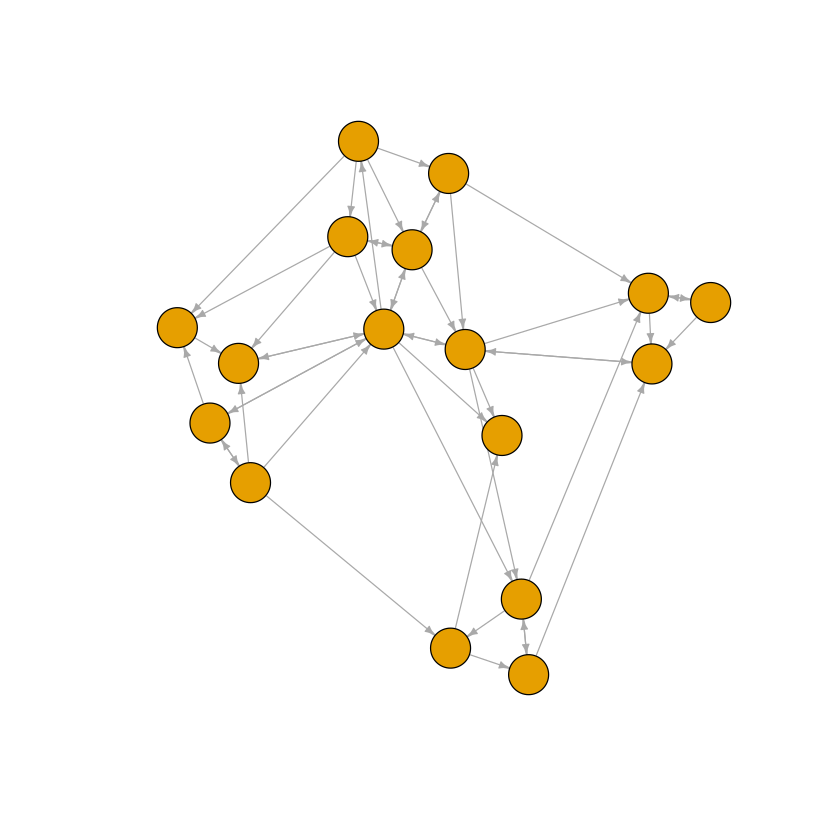

In [14]:
plot(net, edge.arrow.size=.4,vertex.label=NA)

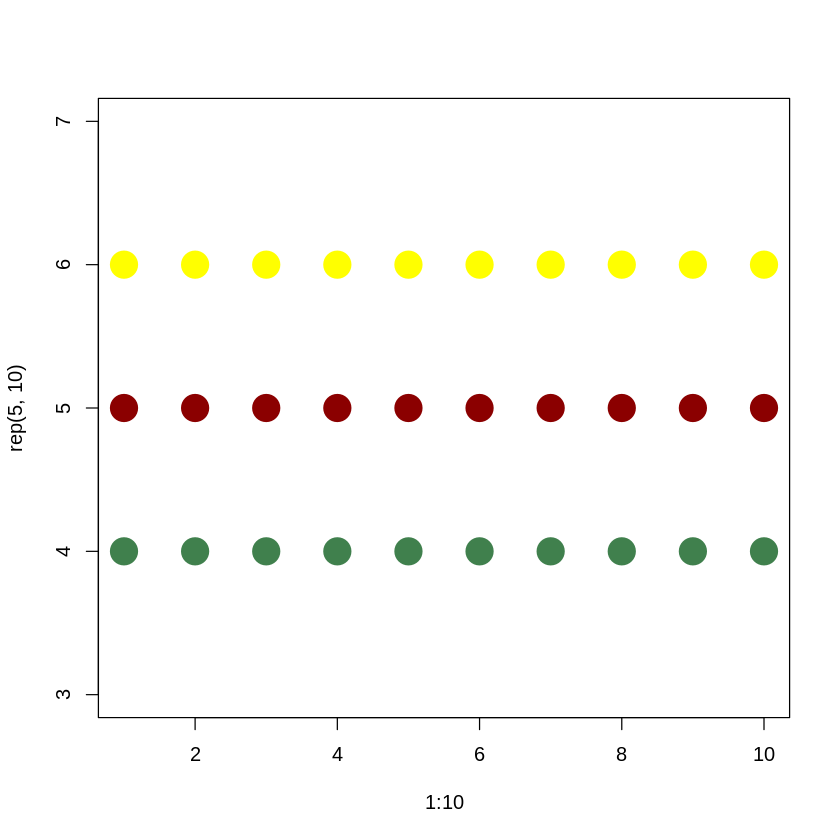

In [15]:
plot(x=1:10, y=rep(5,10), pch=19, cex=3, col="dark red")
points(x=1:10, y=rep(6, 10), pch=19, cex=3, col="557799")
points(x=1:10, y=rep(4, 10), pch=19, cex=3, col=rgb(.25, .5, .3))

In [16]:
plot(x=1:5, y=rep(5,5), pch=19, cex=12, col=rgb(.25, .5, .3, alpha=.5), xlim=c(0,6))  

In [17]:
par(bg="gray40")
col.tr <- grDevices::adjustcolor("557799", alpha=0.7)
plot(x=1:5, y=rep(5,5), pch=19, cex=12, col=col.tr, xlim=c(0,6)) 

In [18]:
colors()                          # List all named colors
grep("blue", colors(), value=T)   # Colors that have "blue" in the name

[1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"           "burlywood4"           "cadetblue"           
 [43] "cadetblue1"           "cadetblue2"           "cadetblue3"          
 [46] "cadetblue4"           "chartreuse"           "chartreuse1"         
 [49] "chartreuse2"          "chartreuse3"          "chartreuse4"         
 [52] "chocolate"            "chocolate1"           "chocolate2"          
 [55] "chocolate3"           "chocolate4"           "coral"               
 [58] "coral1"               "coral2"               "coral3"              
 [61] "coral4"               "cornflowerblue"       "cornsilk"            
 [64] "cornsilk1"            "cornsilk2"            "cornsilk3"           
 [67] "cornsilk4"            "cyan"                 "cyan1"               
 [70] "cyan2"                "cyan3"                "cyan4"               
 [73] "darkblue"             "darkcyan"             "darkgoldenrod"       
 [76] "darkgoldenrod1"       "darkgoldenrod2"       "darkgoldenrod3"      
 [79] "darkgoldenrod4"       "darkgray"             "darkgreen"           
 [82] "darkgrey"             "darkkhaki"            "darkmagenta"         
 [85] "darkolivegreen"       "darkolivegreen1"      "darkolivegreen2"     
 [88] "darkolivegreen3"      "darkolivegreen4"      "darkorange"          
 [91] "darkorange1"          "darkorange2"          "darkorange3"         
 [94] "darkorange4"          "darkorchid"           "darkorchid1"         
 [97] "darkorchid2"          "darkorchid3"          "darkorchid4"         
[100] "darkred"              "darksalmon"           "darkseagreen"        
[103] "darkseagreen1"        "darkseagreen2"        "darkseagreen3"       
[106] "darkseagreen4"        "darkslateblue"        "darkslategray"       
[109] "darkslategray1"       "darkslategray2"       "darkslategray3"      
[112] "darkslategray4"       "darkslategrey"        "darkturquoise"       
[115] "darkviolet"           "deeppink"             "deeppink1"           
[118] "deeppink2"            "deeppink3"            "deeppink4"           
[121] "deepskyblue"          "deepskyblue1"         "deepskyblue2"        
[124] "deepskyblue3"         "deepskyblue4"         "dimgray"             
[127] "dimgrey"              "dodgerblue"           "dodgerblue1"         
[130] "dodgerblue2"          "dodgerblue3"          "dodgerblue4"         
[133] "firebrick"            "firebrick1"           "firebrick2"          
[136] "firebrick3"           "firebrick4"           "floralwhite"         
[139] "forestgreen"          "gainsboro"            "ghostwhite"          
[142] "gold"                 "gold1"                "gold2"               
[145] "gold3"                "gold4"                "goldenrod"           
[148] "goldenrod1"           "goldenrod2"           "goldenrod3"          
[151] "goldenrod4"           "gray"                 "gray0"               
[154] "gray1"                "gray2"                "gray3"               
[157] "gray4"                "gray5"                "gray6"               
[160] "gray7"              

[1] "aliceblue"       "blue"            "blue1"           "blue2"          
 [5] "blue3"           "blue4"           "blueviolet"      "cadetblue"      
 [9] "cadetblue1"      "cadetblue2"      "cadetblue3"      "cadetblue4"     
[13] "cornflowerblue"  "darkblue"        "darkslateblue"   "deepskyblue"    
[17] "deepskyblue1"    "deepskyblue2"    "deepskyblue3"    "deepskyblue4"   
[21] "dodgerblue"      "dodgerblue1"     "dodgerblue2"     "dodgerblue3"    
[25] "dodgerblue4"     "lightblue"       "lightblue1"      "lightblue2"     
[29] "lightblue3"      "lightblue4"      "lightskyblue"    "lightskyblue1"  
[33] "lightskyblue2"   "lightskyblue3"   "lightskyblue4"   "lightslateblue" 
[37] "lightsteelblue"  "lightsteelblue1" "lightsteelblue2" "lightsteelblue3"
[41] "lightsteelblue4" "mediumblue"      "mediumslateblue" "midnightblue"   
[45] "navyblue"        "powderblue"      "royalblue"       "royalblue1"     
[49] "royalblue2"      "royalblue3"      "royalblue4"      "skyblue"        
[53] "skyblue1"        "skyblue2"        "skyblue3"        "skyblue4"       
[57] "slateblue"       "slateblue1"      "slateblue2"      "slateblue3"     
[61] "slateblue4"      "steelblue"       "steelblue1"      "steelblue2"     
[65] "steelblue3"      "steelblue4"

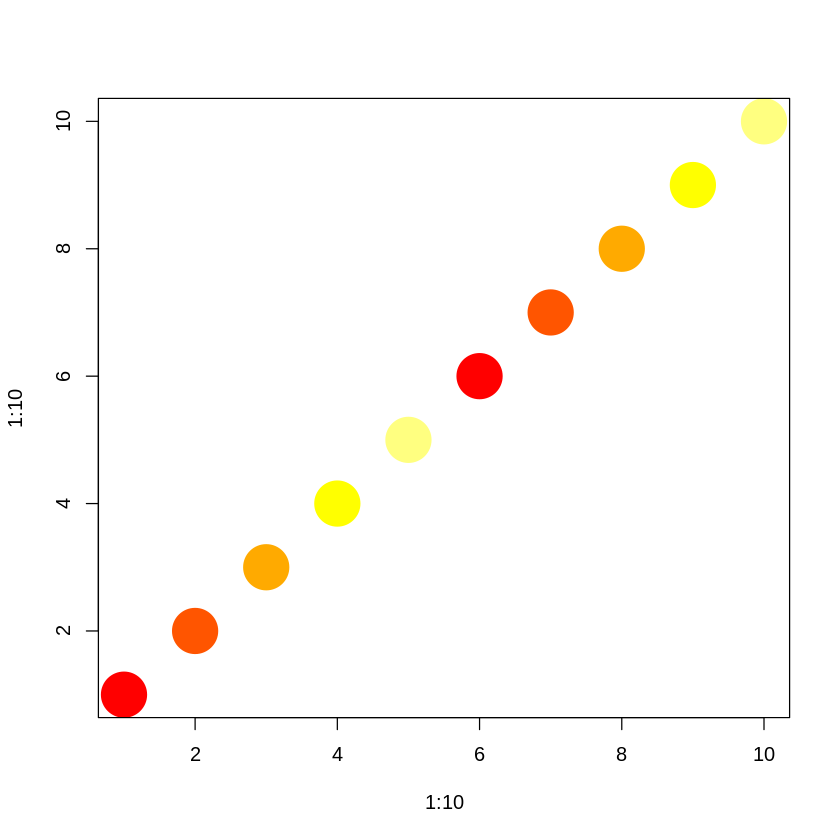

In [19]:
pal1 <- heat.colors(5, alpha=1)   #  5 colors from the heat palette, opaque
pal2 <- rainbow(5, alpha=.5)      #  5 colors from the heat palette, transparent
plot(x=1:10, y=1:10, pch=19, cex=5, col=pal1)

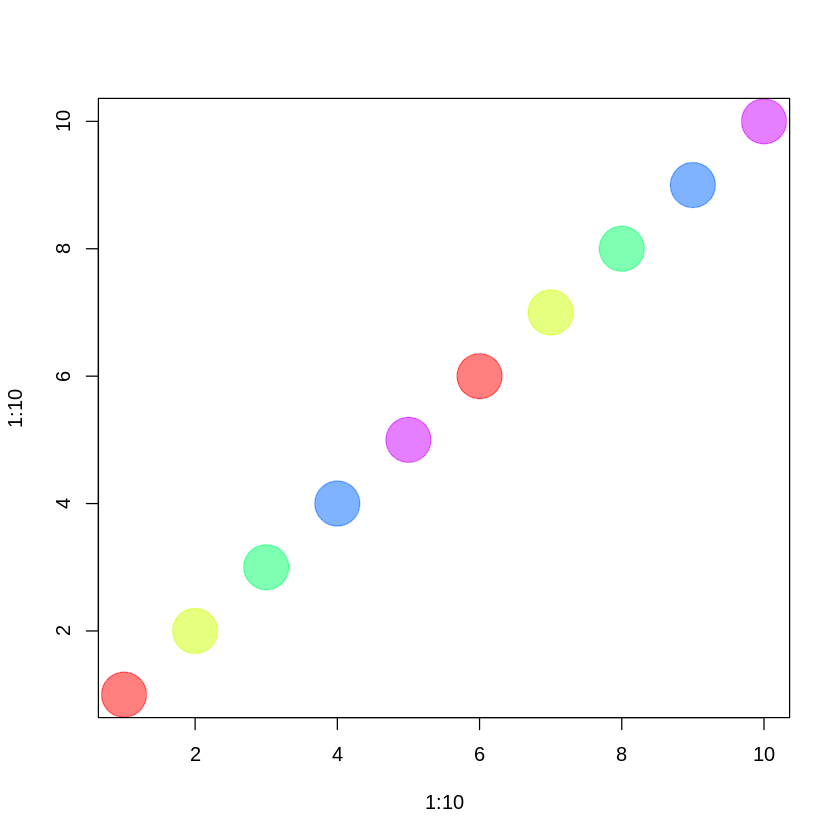

In [20]:
plot(x=1:10, y=1:10, pch=19, cex=5, col=pal2)

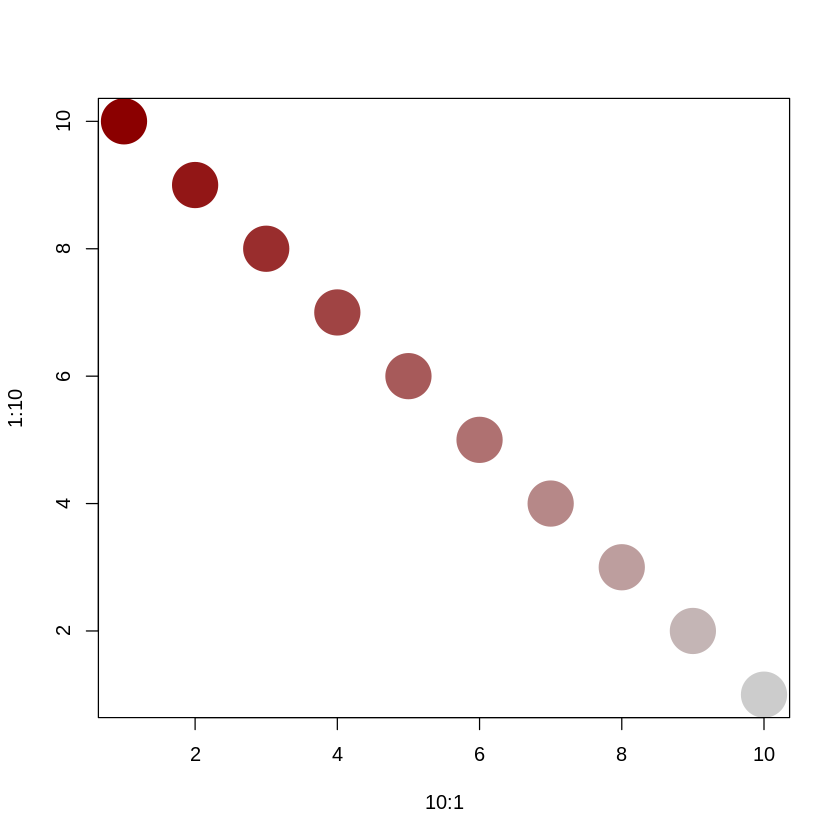

In [21]:
palf <- colorRampPalette(c("gray80", "dark red")) 
plot(x=10:1, y=1:10, pch=19, cex=5, col=palf(10)) 

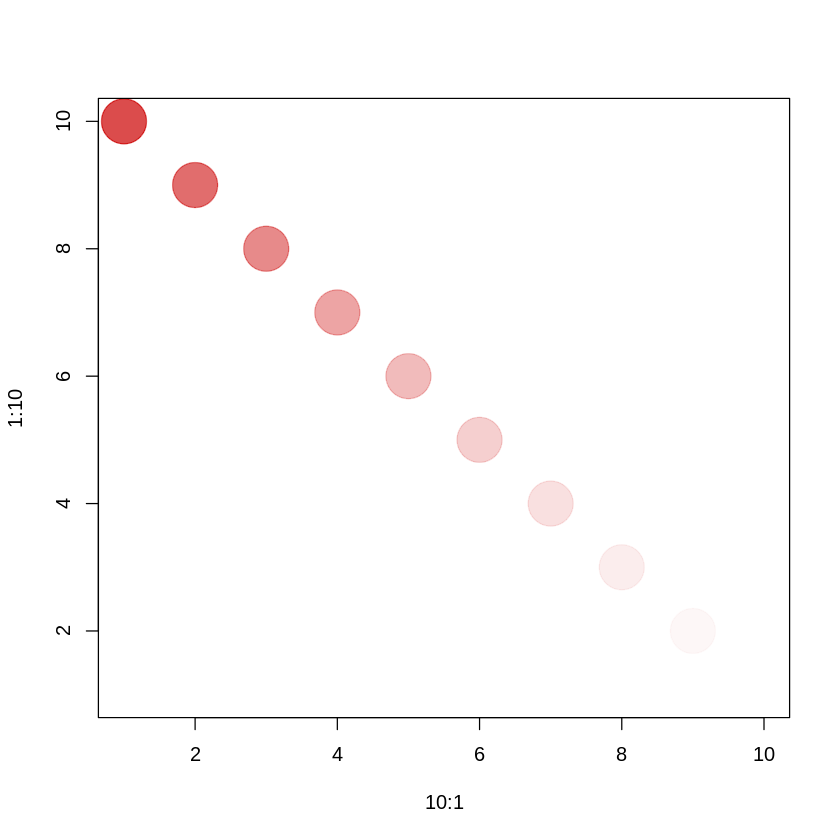

In [22]:
palf <- colorRampPalette(c(rgb(1,1,1, .2),rgb(.8,0,0, .7)), alpha=TRUE)
plot(x=10:1, y=1:10, pch=19, cex=5, col=palf(10)) 

In [23]:
# If you don't have R ColorBrewer already, you will need to install it:
install.packages("RColorBrewer")
library(RColorBrewer)
display.brewer.all()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


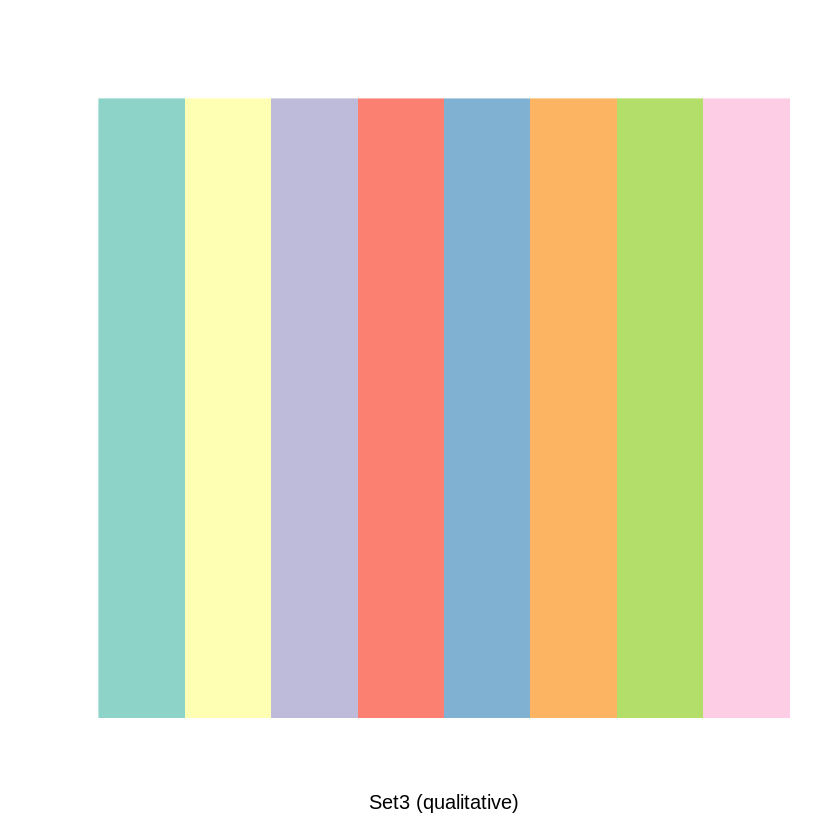

In [24]:
display.brewer.pal(8, "Set3")

In [25]:
display.brewer.pal(8, "Spectral")

In [26]:
display.brewer.pal(8, "Blues")

In [27]:
pal3 <- brewer.pal(10, "Set3") 
plot(x=10:1, y=10:1, pch=19, cex=4, col=pal3)

In [28]:
install.packages("extrafont")
library(extrafont)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registering fonts with R


Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] 


Exiting.


NULL

ERROR: Error in loadfonts(device = "win"): could not find function "windowsFonts"


In [29]:
# Import system fonts - may take a while, so DO NOT run this during the workshop.
font_import() 
fonts() # See what font families are available to you now.
loadfonts(device = "win") # use device = "pdf" for pdf plot output. 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] 


Exiting.


NULL

ERROR: Error in loadfonts(device = "win"): could not find function "windowsFonts"


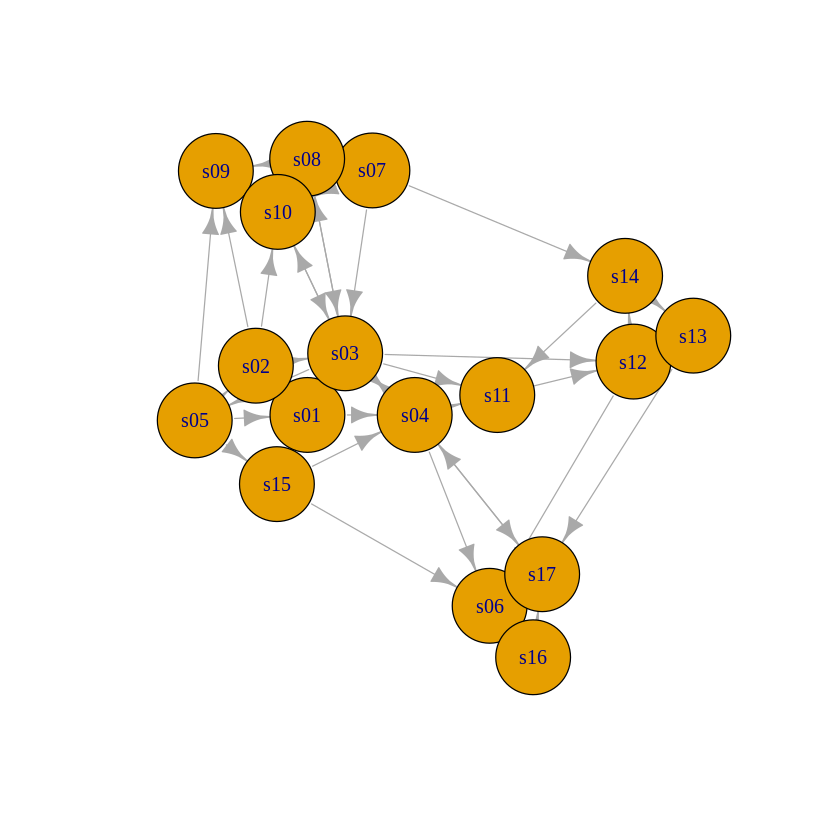

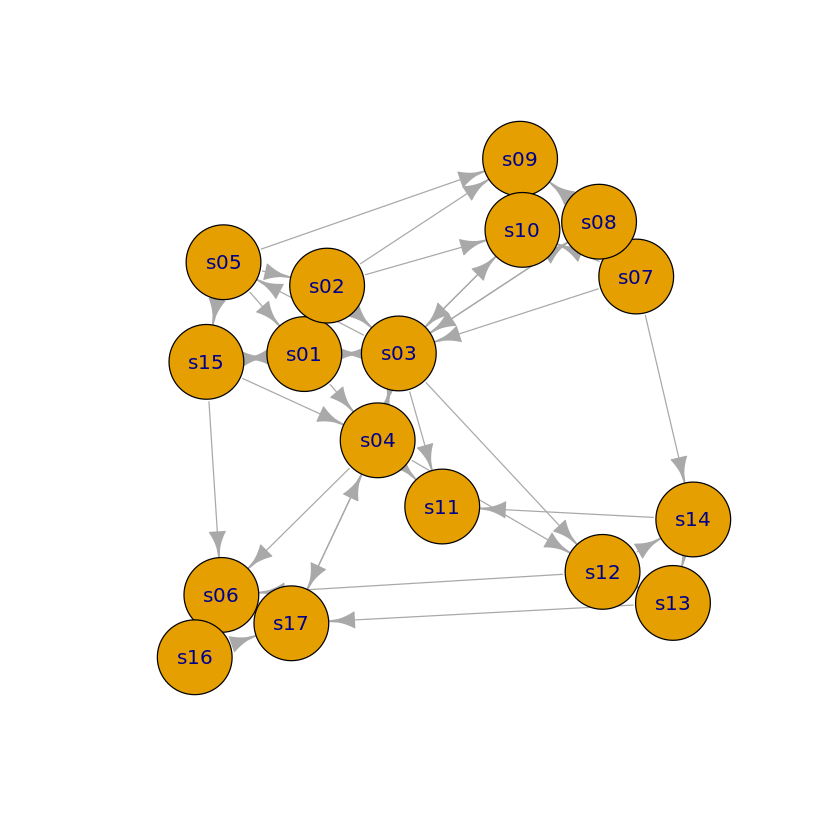

In [30]:
plot(net, vertex.size=30)
plot(net, vertex.size=30, vertex.label.family="Arial Black" )

In [31]:
# Plot with curved edges (edge.curved=.1) and reduce arrow size:
plot(net, edge.arrow.size=.4, edge.curved=.1)

In [32]:
# Set edge color to light gray, the node & border color to orange 
# Replace the vertex label with the node names stored in "media"
plot(net, edge.arrow.size=.2, edge.color="orange",
     vertex.color="orange", vertex.frame.color="#ffffff",
     vertex.label=V(net)$media, vertex.label.color="black")

In [33]:
# Generate colors base on media type:
colrs <- c("gray50", "tomato", "gold")
V(net)$color <- colrs[V(net)$media.type]

# Compute node degrees (#links) and use that to set node size:
deg <- degree(net, mode="all")
V(net)$size <- deg*3
# We could also use the audience size value:
V(net)$size <- V(net)$audience.size*0.6

# The labels are currently node IDs.
# Setting them to NA will render no labels:
V(net)$label <- NA

# Set edge width based on weight:
E(net)$width <- E(net)$weight/6

#change arrow size and edge color:
E(net)$arrow.size <- .2
E(net)$edge.color <- "gray80"
E(net)$width <- 1+E(net)$weight/12
plot(net)

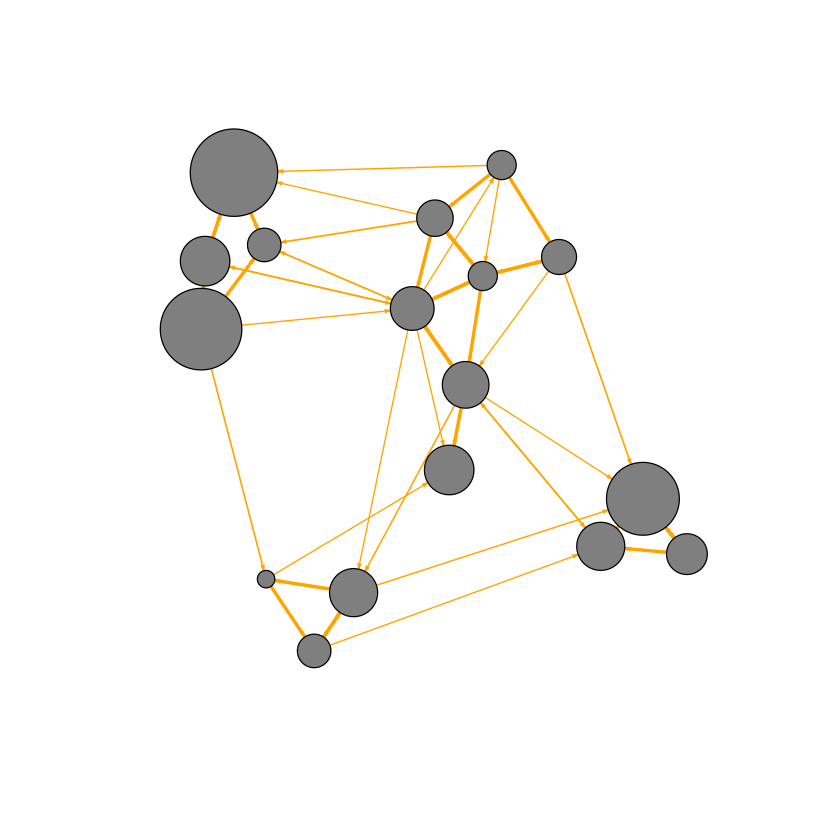

In [34]:
plot(net, edge.color="orange", vertex.color="gray50") 

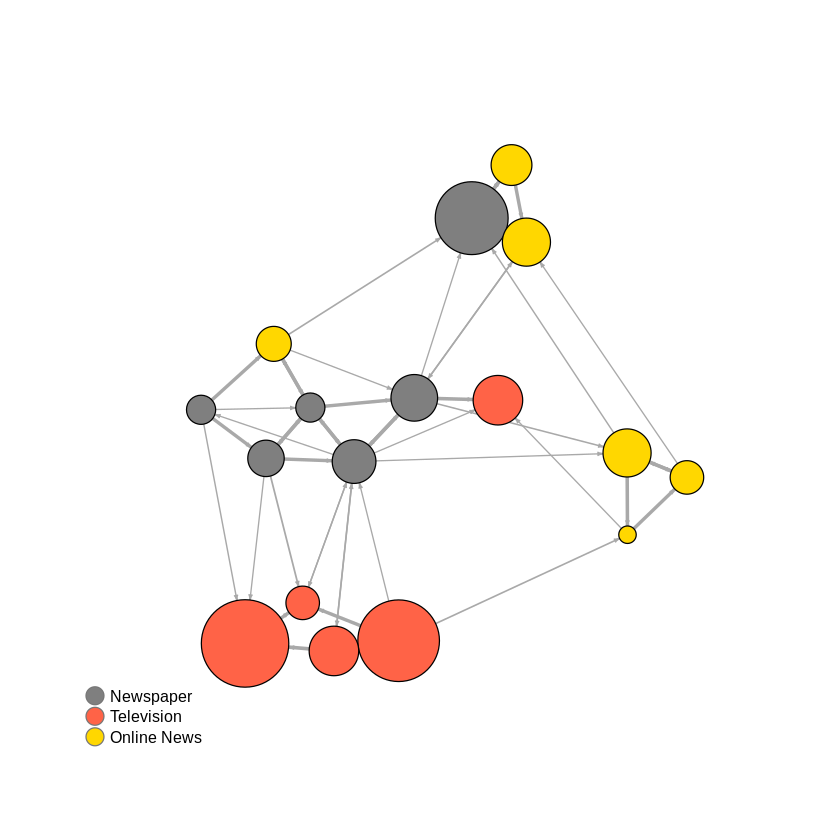

In [35]:
plot(net) 
legend(x=-1.5, y=-1.1, c("Newspaper","Television", "Online News"), pch=21,
       col="#777777", pt.bg=colrs, pt.cex=2, cex=.8, bty="n", ncol=1)

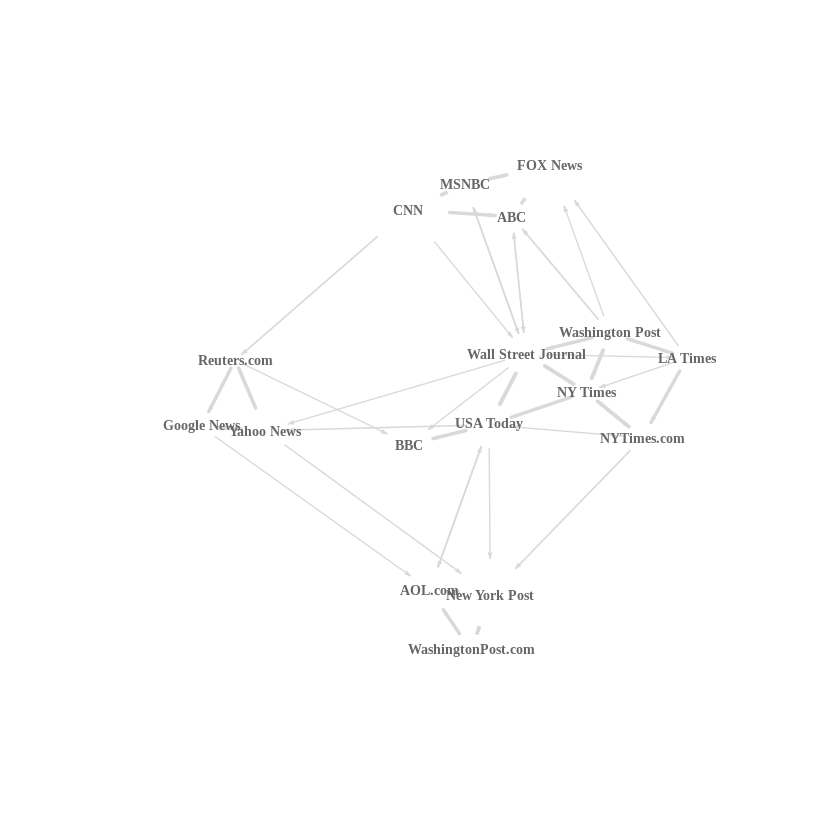

In [36]:
plot(net, vertex.shape="none", vertex.label=V(net)$media, 
     vertex.label.font=2, vertex.label.color="gray40",
     vertex.label.cex=.7, edge.color="gray85")

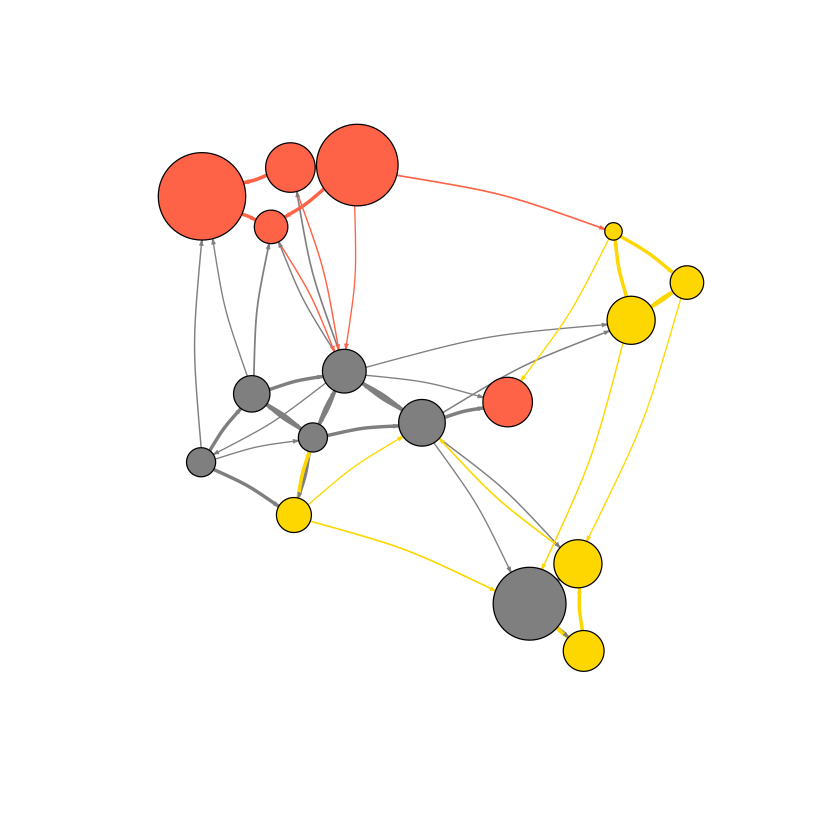

In [37]:
edge.start <- get.edges(net, 1:ecount(net))[,1]
edge.col <- V(net)$color[edge.start]

plot(net, edge.color=edge.col, edge.curved=.1) 

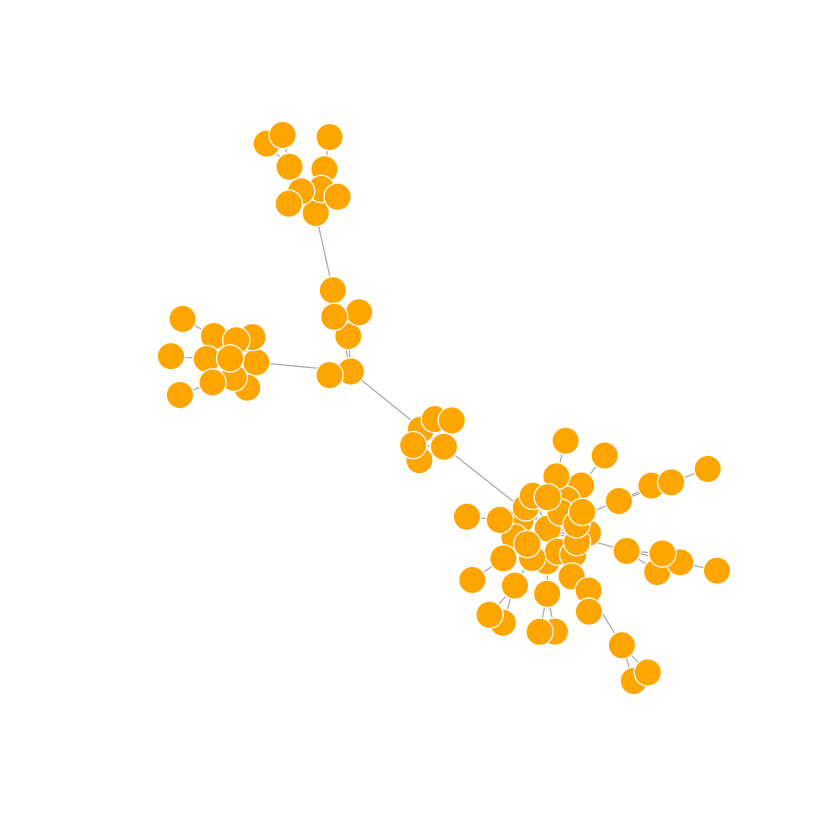

In [38]:
net.bg <- barabasi.game(80) 
V(net.bg)$frame.color <- "white"
V(net.bg)$color <- "orange"
V(net.bg)$label <- "" 
V(net.bg)$size <- 10
E(net.bg)$arrow.mode <- 0
plot(net.bg)

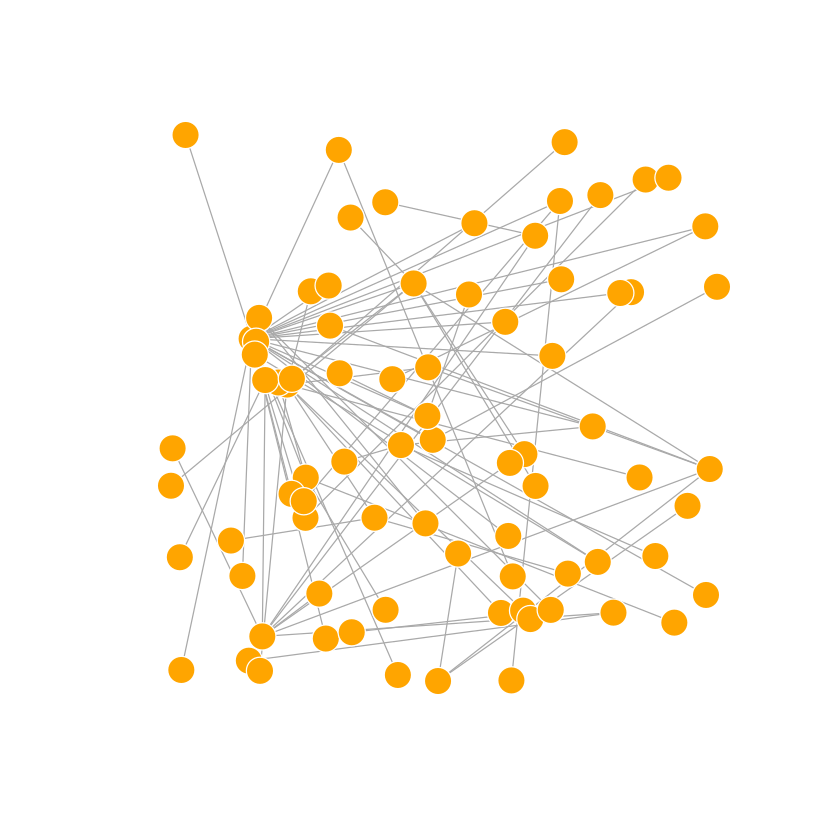

In [39]:
plot(net.bg, layout=layout.random)

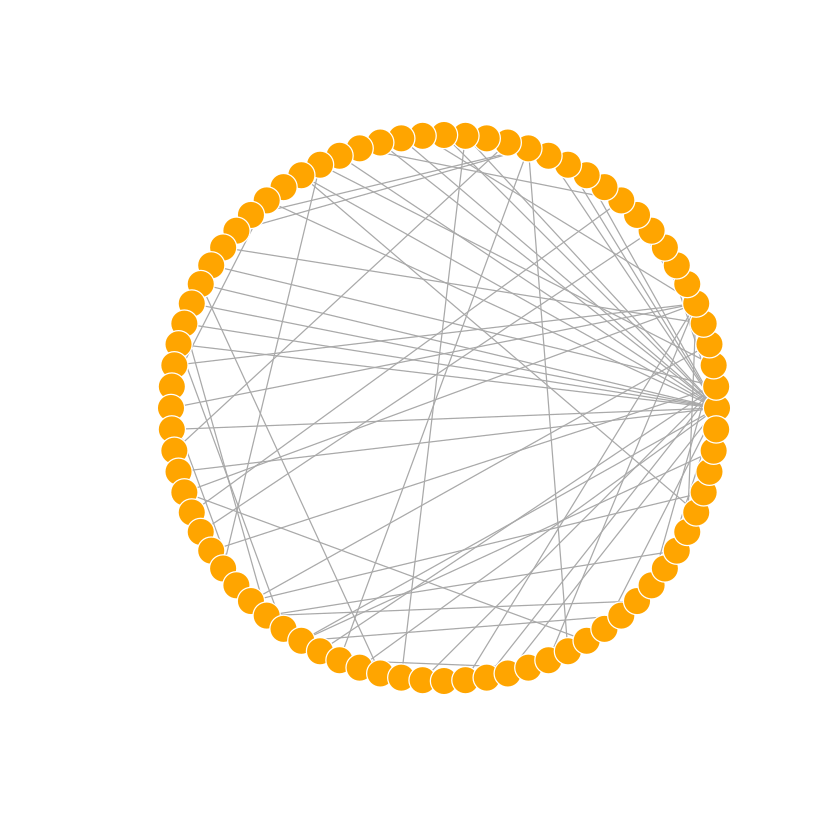

In [40]:
l <- layout.circle(net.bg)
plot(net.bg, layout=l)

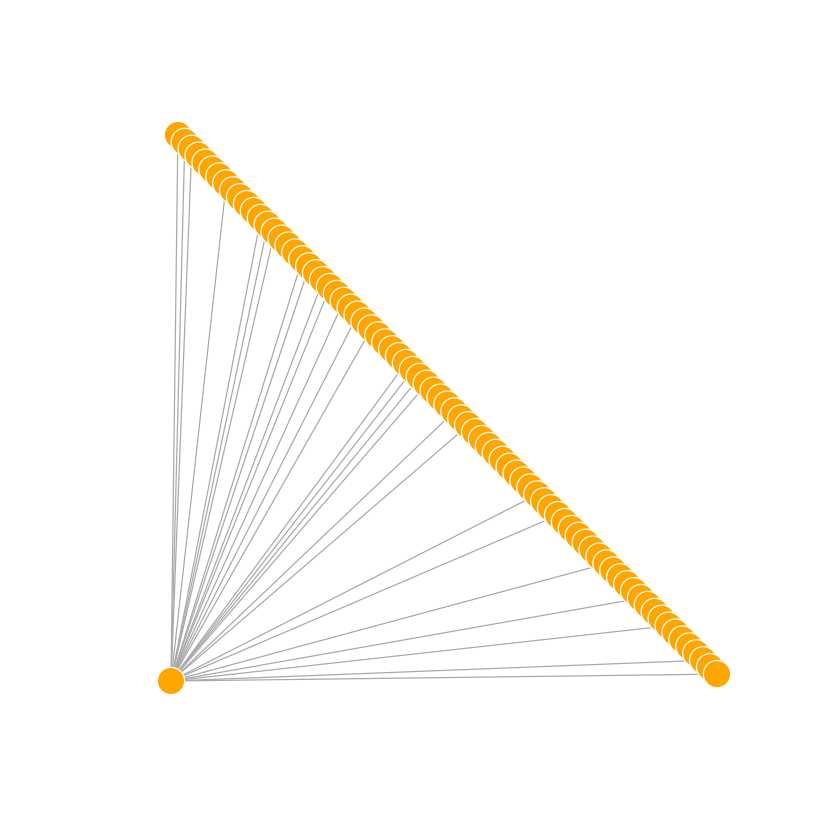

In [41]:
l <- matrix(c(1:vcount(net.bg), c(1, vcount(net.bg):2)), vcount(net.bg), 2)
plot(net.bg, layout=l)

In [42]:
l <- layout.random(net.bg)
plot(net.bg, layout=l)

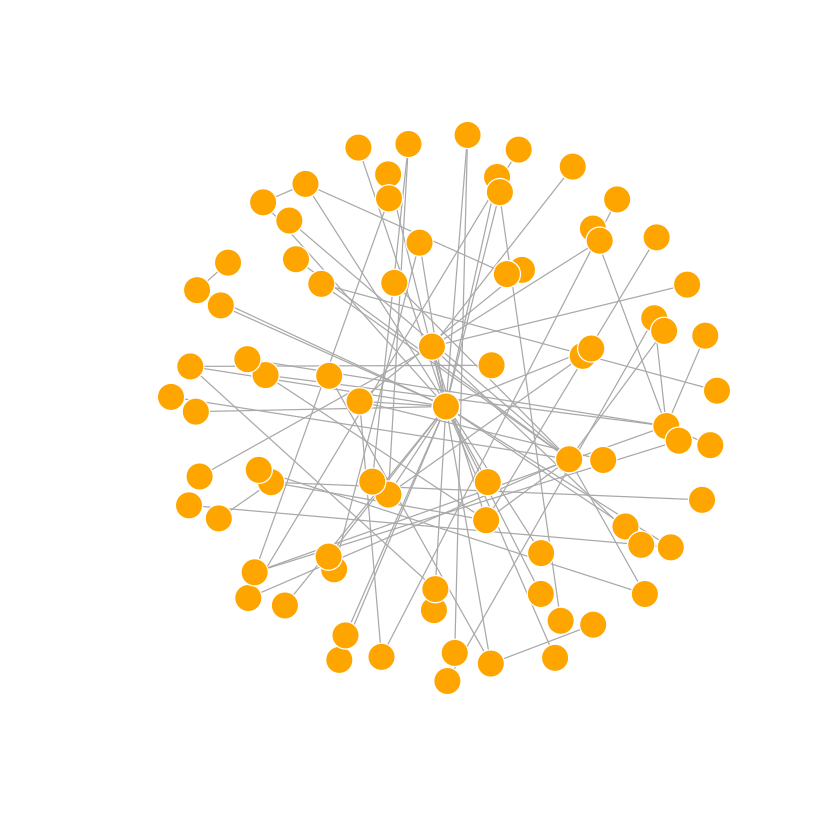

In [43]:
# 3D sphere layout
l <- layout.sphere(net.bg)
plot(net.bg, layout=l)

Warning message in layout_with_fr(structure(list(80, TRUE, c(1, 2, 3, 4, 5, 6, 7, :
“Argument `area' is deprecated and has no effect”Warning message in layout_with_fr(structure(list(80, TRUE, c(1, 2, 3, 4, 5, 6, 7, :
“Argument `repulserad' is deprecated and has no effect”

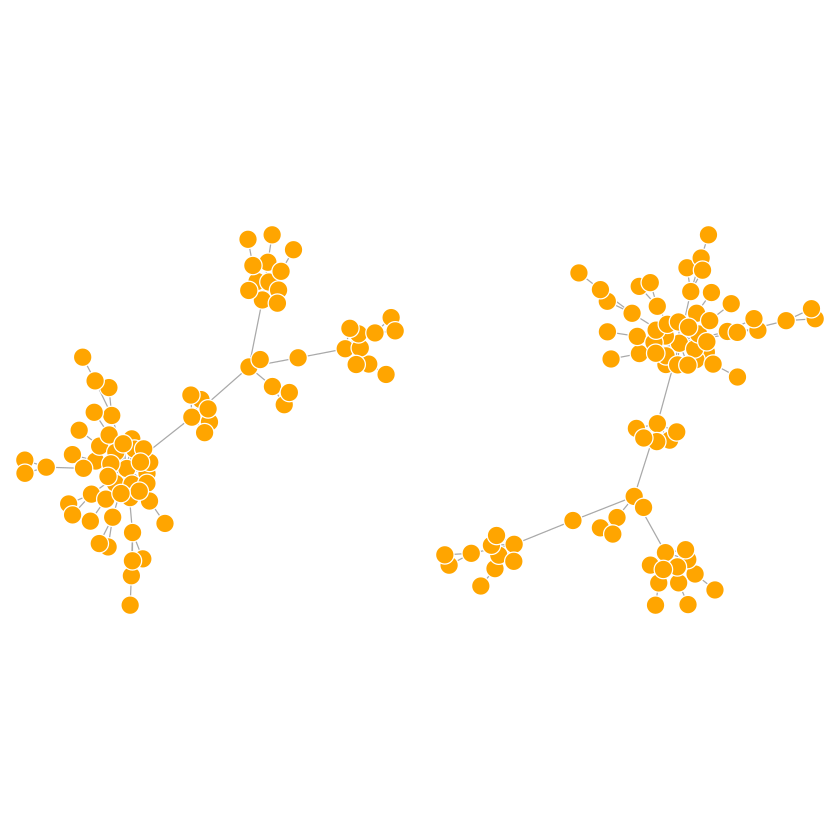

In [44]:
l <- layout.fruchterman.reingold(net.bg, repulserad=vcount(net.bg)^3, 
                                      area=vcount(net.bg)^2.4)
par(mfrow=c(1,2),  mar=c(0,0,0,0)) # plot two figures - 1 row, 2 columns
plot(net.bg, layout=layout.fruchterman.reingold)
plot(net.bg, layout=l)

In [45]:
dev.off() # shut off the  graphic device to clear the two-figure configuration.

null device 
          1

Warning message in layout.spring(net.bg, mass = 0.5):
“Spring layout was removed, we use Fruchterman-Reingold instead.”

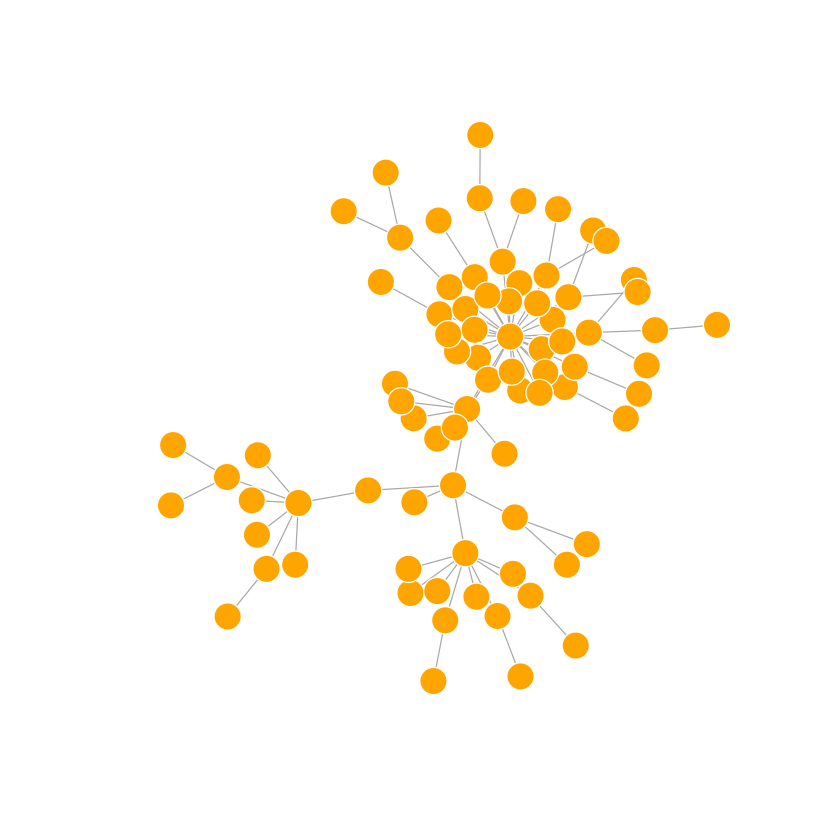

In [46]:
l <- layout.kamada.kawai(net.bg)
plot(net.bg, layout=l)

l <- layout.spring(net.bg, mass=.5)
plot(net.bg, layout=l)

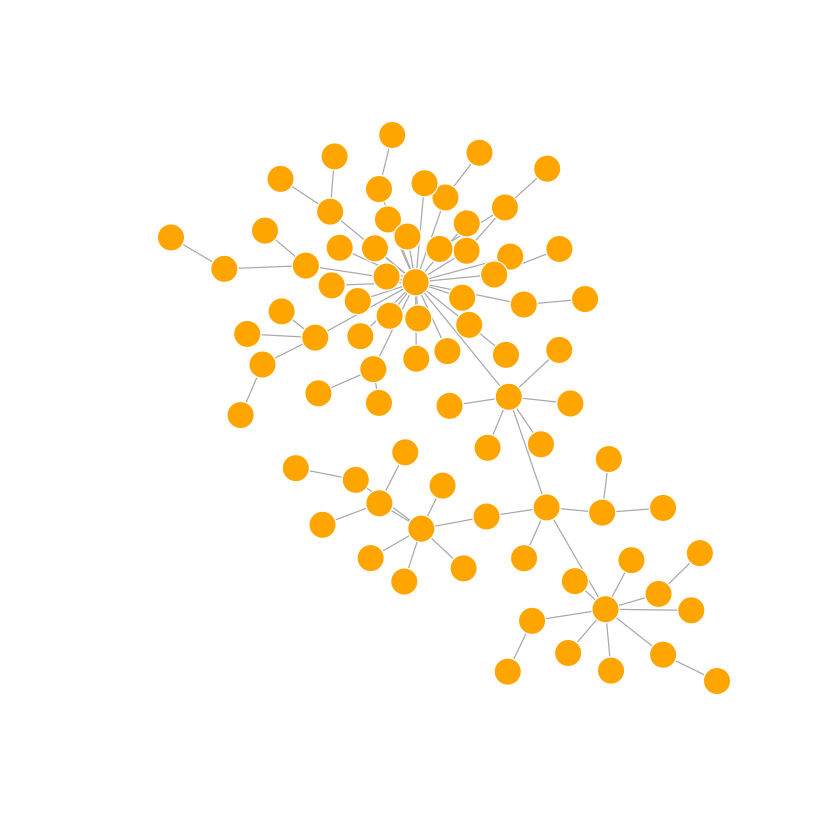

In [47]:
plot(net.bg, layout=layout.lgl)

In [48]:
l <- layout.fruchterman.reingold(net.bg)
l <- layout.norm(l, ymin=-1, ymax=1, xmin=-1, xmax=1)

par(mfrow=c(2,2), mar=c(0,0,0,0))
plot(net.bg, rescale=F, layout=l*0.4)
plot(net.bg, rescale=F, layout=l*0.6)
plot(net.bg, rescale=F, layout=l*0.8)
plot(net.bg, rescale=F, layout=l*1.0)

In [49]:
layouts <- grep("^layout\\.", ls("package:igraph"), value=TRUE) 
# Remove layouts that do not apply to our graph.
layouts <- layouts[!grepl("bipartite|merge|norm|sugiyama", layouts)]

par(mfrow=c(3,3))

for (layout in layouts) {
  print(layout)
  l <- do.call(layout, list(net)) 
  plot(net, edge.arrow.mode=0, layout=l, main=layout) }

dev.off()

[1] "layout.auto"
[1] "layout.circle"
[1] "layout.davidson.harel"
[1] "layout.drl"
[1] "layout.fruchterman.reingold"
[1] "layout.fruchterman.reingold.grid"


Warning message in layout.fruchterman.reingold.grid(structure(list(17, TRUE, c(0, :
“Grid Fruchterman-Reingold layout was removed,
we use Fruchterman-Reingold instead.”

[1] "layout.gem"
[1] "layout.graphopt"
[1] "layout.grid"
[1] "layout.grid.3d"


Warning message:
“layout.grid.3d is deprecated from
igraph 0.8.0, please use layout_on_grid instead”

[1] "layout.kamada.kawai"
[1] "layout.lgl"
[1] "layout.mds"
[1] "layout.random"
[1] "layout.reingold.tilford"


Warning message in layout_as_tree(structure(list(17, TRUE, c(0, 0, 0, 0, 1, 1, 1, :
“At structural_properties.c:3346 :graph contains a cycle, partial result is returned”

[1] "layout.sphere"
[1] "layout.spring"


Warning message in layout.spring(structure(list(17, TRUE, c(0, 0, 0, 0, 1, 1, 1, :
“Spring layout was removed, we use Fruchterman-Reingold instead.”

[1] "layout.star"
[1] "layout.svd"


Warning message in layout.svd(structure(list(17, TRUE, c(0, 0, 0, 0, 1, 1, 1, 1, :
“SVD layout was removed, we use Fruchterman-Reingold instead.”

null device 
          1

[1] 12.40816

[1] 9.905635

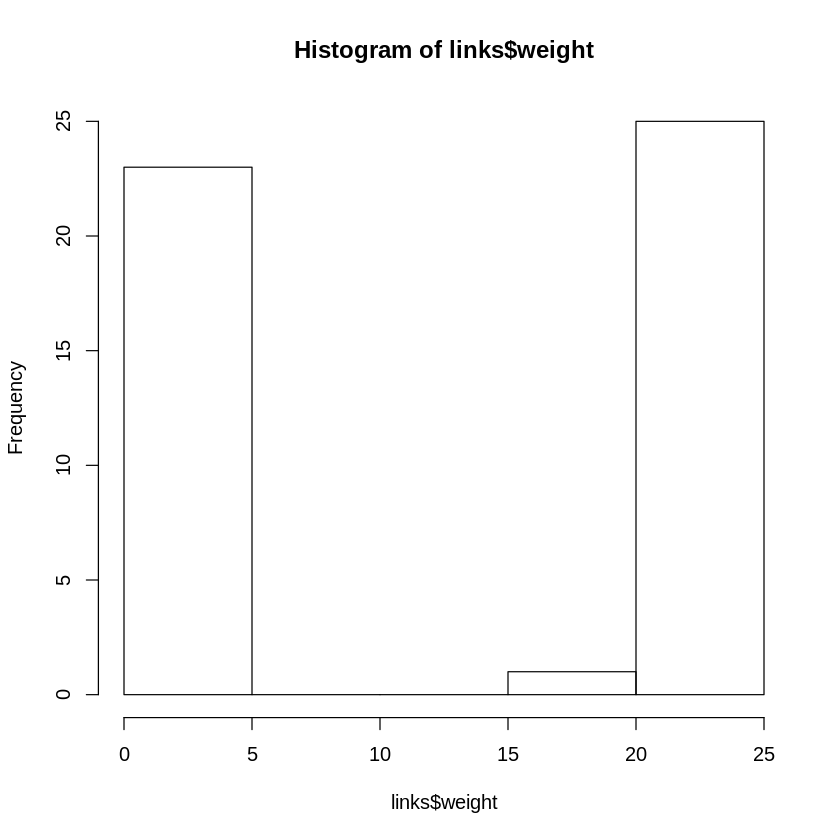

In [50]:
hist(links$weight)
mean(links$weight)
sd(links$weight)

Warning message in layout_with_fr(structure(list(17, TRUE, c(0, 0, 0, 0, 1, 1, 2, :
“Argument `repulserad' is deprecated and has no effect”

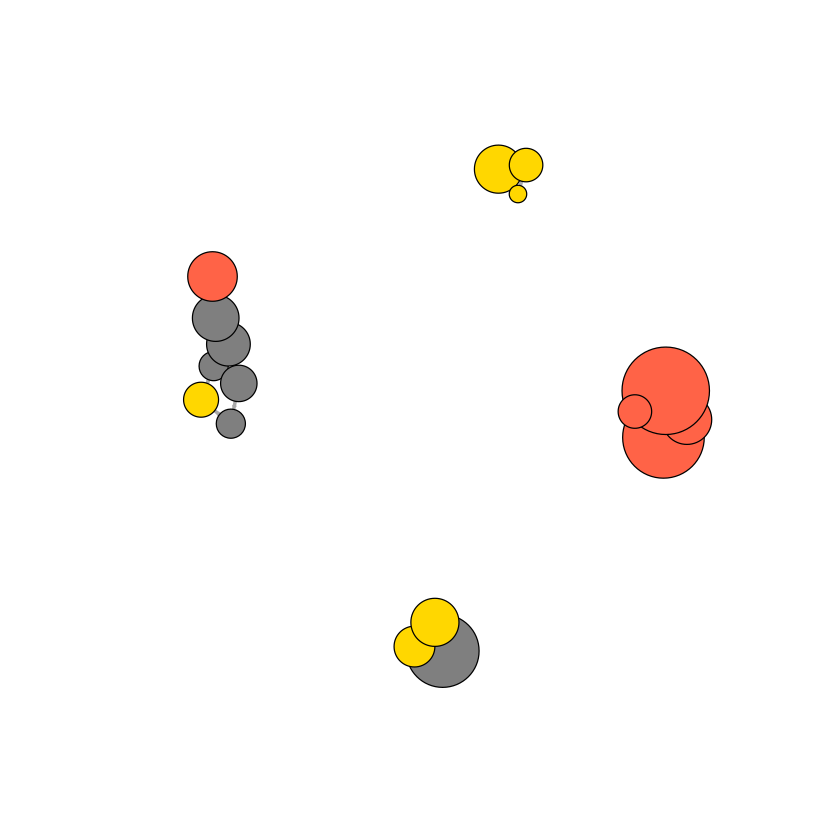

In [51]:
cut.off <- mean(links$weight) 
net.sp <- delete.edges(net, E(net)[weight<cut.off])
l <- layout.fruchterman.reingold(net.sp, repulserad=vcount(net)^2.1)
plot(net.sp, layout=l) 

In [52]:
E(net)$width <- 1.5
plot(net, edge.color=c("dark red", "slategrey")[(E(net)$type=="hyperlink")+1],
      vertex.color="gray40", layout=layout.circle)

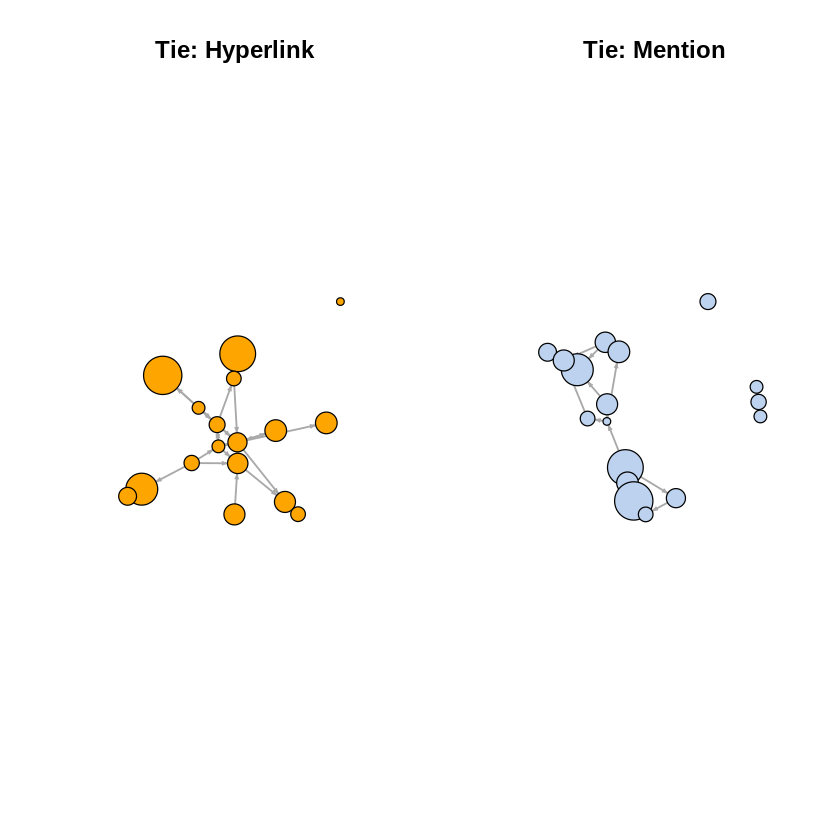

In [53]:
net.m <- net - E(net)[E(net)$type=="hyperlink"] # another way to delete edges
net.h <- net - E(net)[E(net)$type=="mention"]

par(mfrow=c(1,2))
plot(net.h, vertex.color="orange", main="Tie: Hyperlink")
plot(net.m, vertex.color="lightsteelblue2", main="Tie: Mention")

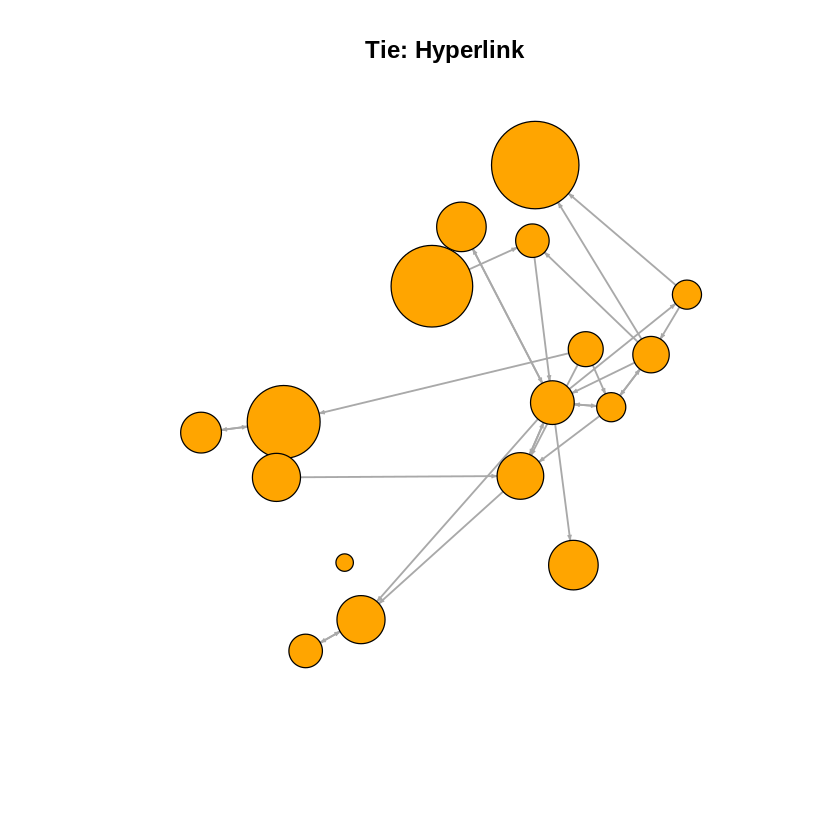

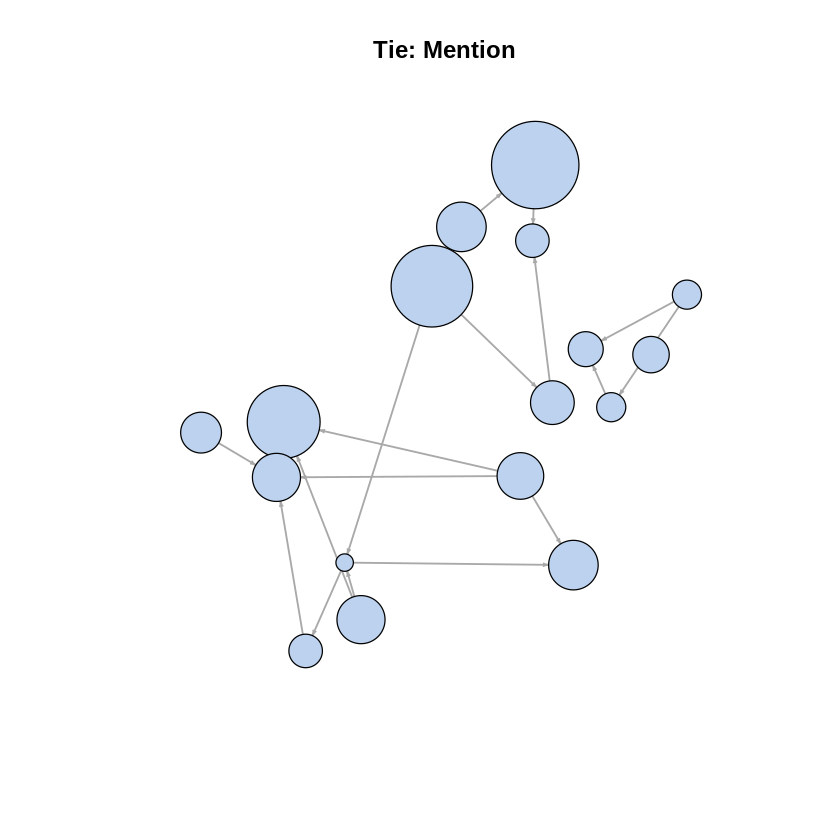

In [54]:
l <- layout.fruchterman.reingold(net)
plot(net.h, vertex.color="orange", layout=l, main="Tie: Hyperlink")
plot(net.m, vertex.color="lightsteelblue2", layout=l, main="Tie: Mention")

In [55]:
V(net)$community <- optimal.community(net)$membership
colrs <- adjustcolor( c("gray50", "tomato", "gold", "yellowgreen"), alpha=.6)
plot(net, vertex.color=colrs[V(net)$community])

ERROR: Error in optimal.community(net): At optimal_modularity.c:85 : GLPK is not available, Unimplemented function call


Warning message in shortest.paths(net, algorithm = "unweighted"):
“Unweighted algorithm chosen, weights ignored”

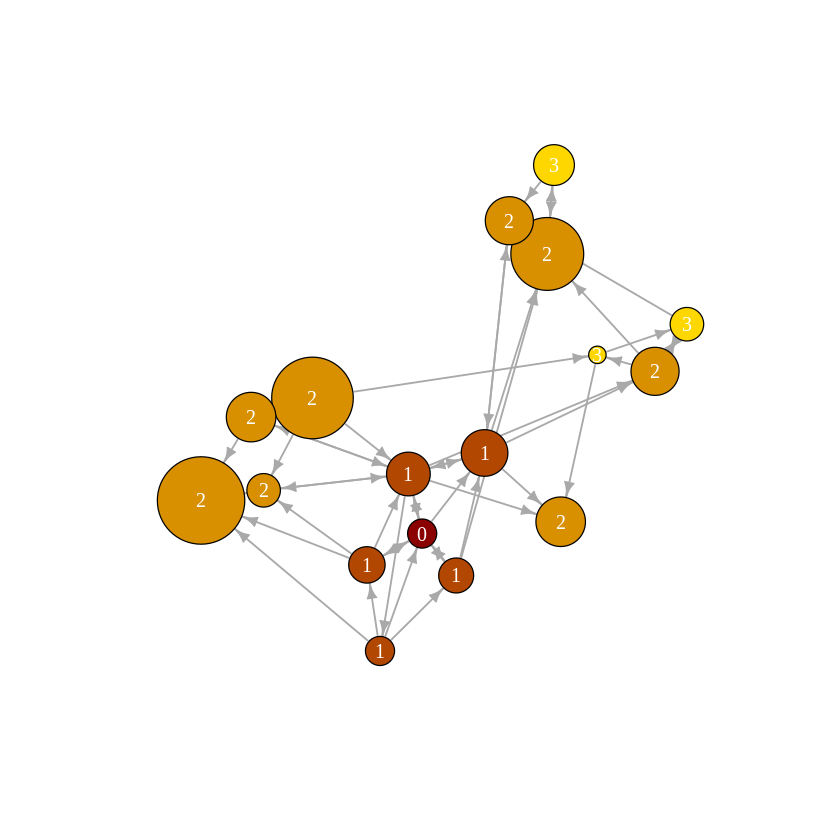

In [56]:
dist.from.NYT <- shortest.paths(net, algorithm="unweighted")[1,]
oranges <- colorRampPalette(c("dark red", "gold"))
col <- oranges(max(dist.from.NYT)+1)[dist.from.NYT+1]

plot(net, vertex.color=col, vertex.label=dist.from.NYT, edge.arrow.size=.6, 
     vertex.label.color="white")

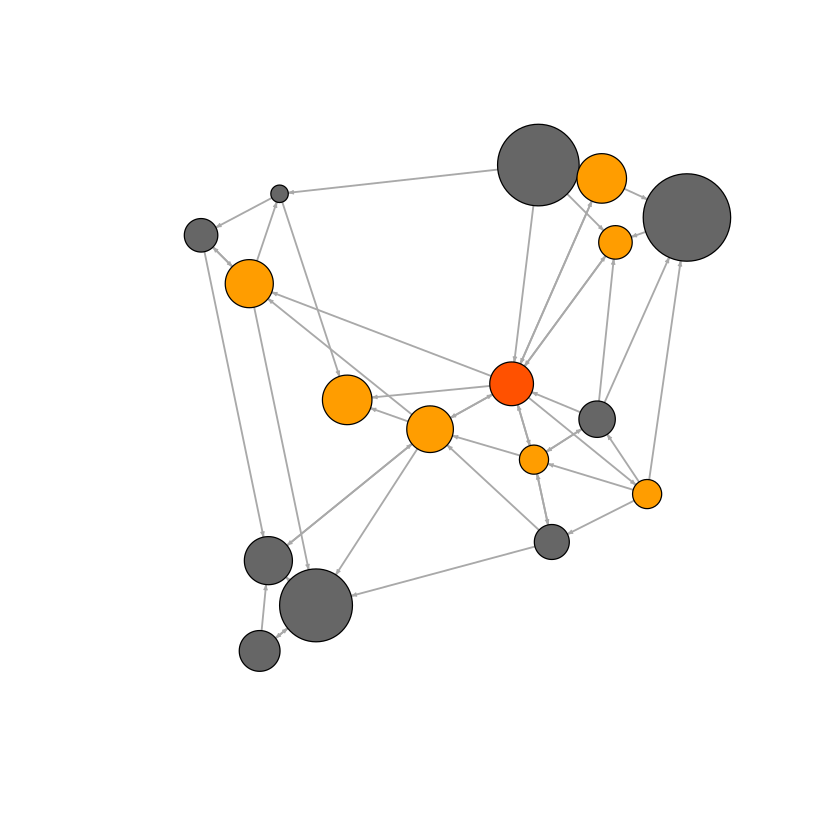

In [57]:
col <- rep("grey40", vcount(net))
col[V(net)$media=="Wall Street Journal"] <- "#ff5100"

neigh.nodes <- neighbors(net, V(net)[media=="Wall Street Journal"], mode="out")

col[neigh.nodes] <- "#ff9d00"
plot(net, vertex.color=col)

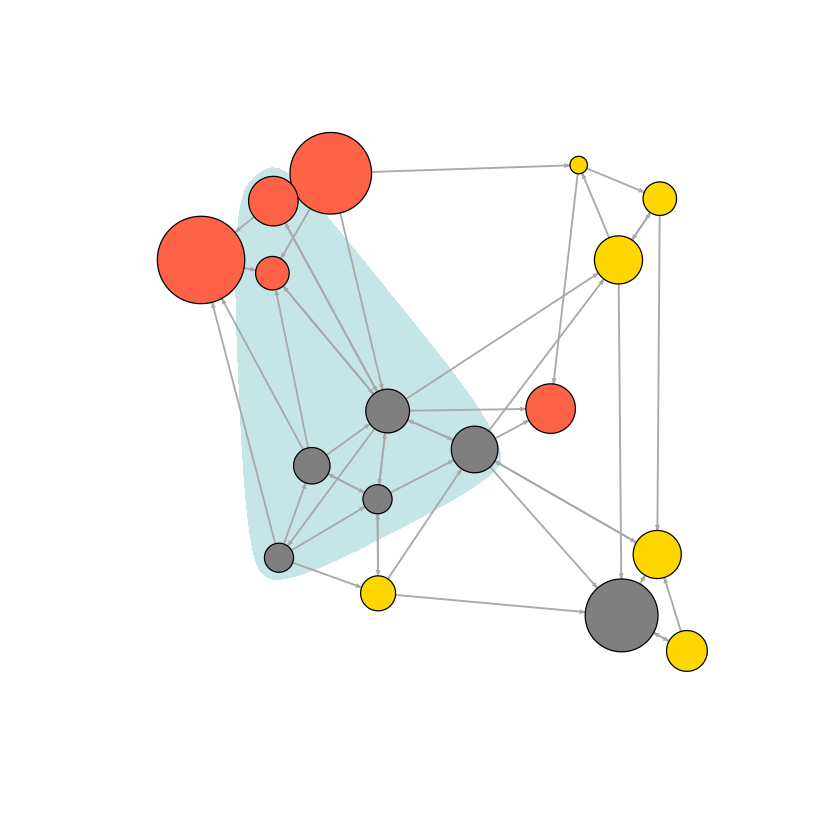

In [58]:
plot(net, mark.groups=c(1,4,5,8), mark.col="#C5E5E7", mark.border=NA)

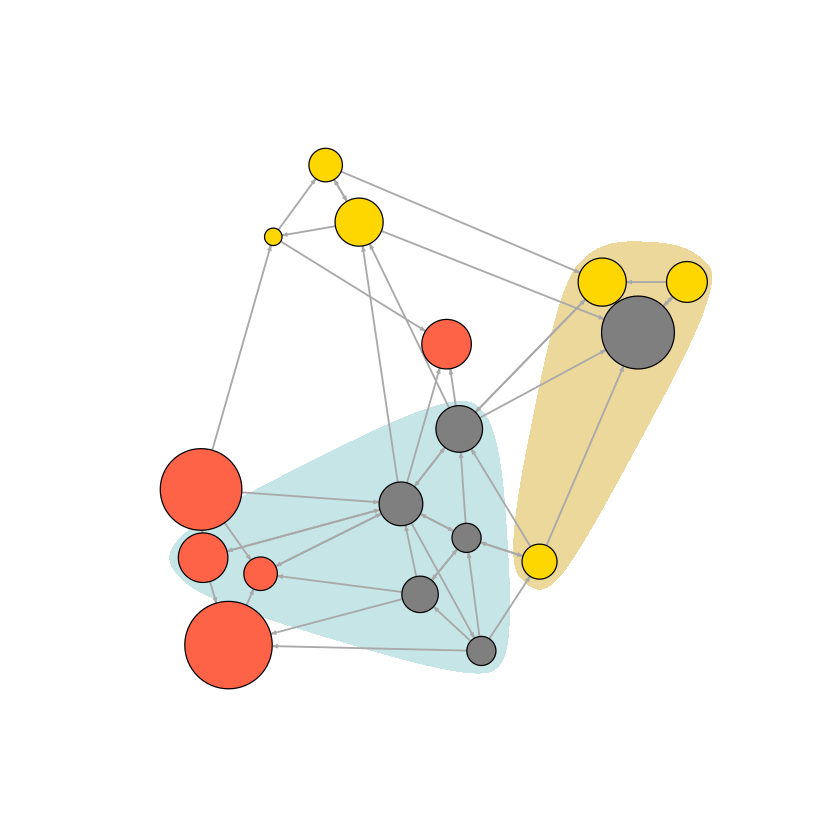

In [59]:
# Mark multiple groups:
plot(net, mark.groups=list(c(1,4,5,8), c(15:17)), 
          mark.col=c("#C5E5E7","#ECD89A"), mark.border=NA)

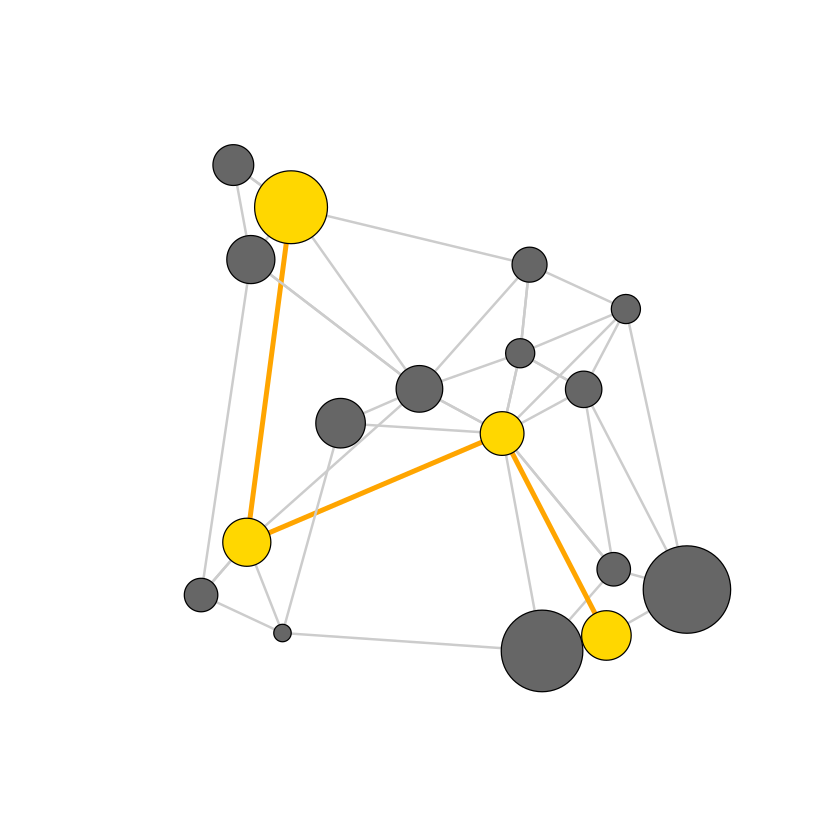

In [60]:
news.path <- get.shortest.paths(net, V(net)[media=="MSNBC"], 
                                V(net)[media=="New York Post"],
                                mode="all", output="both")


# Generate edge color variable:
ecol <- rep("gray80", ecount(net))
ecol[unlist(news.path$epath)] <- "orange"

# Generate edge width variable:
ew <- rep(2, ecount(net))
ew[unlist(news.path$epath)] <- 4

# Generate node color variable:
vcol <- rep("gray40", vcount(net))
vcol[unlist(news.path$vpath)] <- "gold"

plot(net, vertex.color=vcol, edge.color=ecol, 
     edge.width=ew, edge.arrow.mode=0)

In [61]:
tkid <- tkplot(net) #tkid is the id of the tkplot that will open
l <- tkplot.getcoords(tkid) # grab the coordinates from tkplot
plot(net, layout=l)

Warning message:
“no DISPLAY variable so Tk is not available”

ERROR: Error in structure(.External(.C_dotTclObjv, objv), class = "tclObj"): [tcl] invalid command name "font".



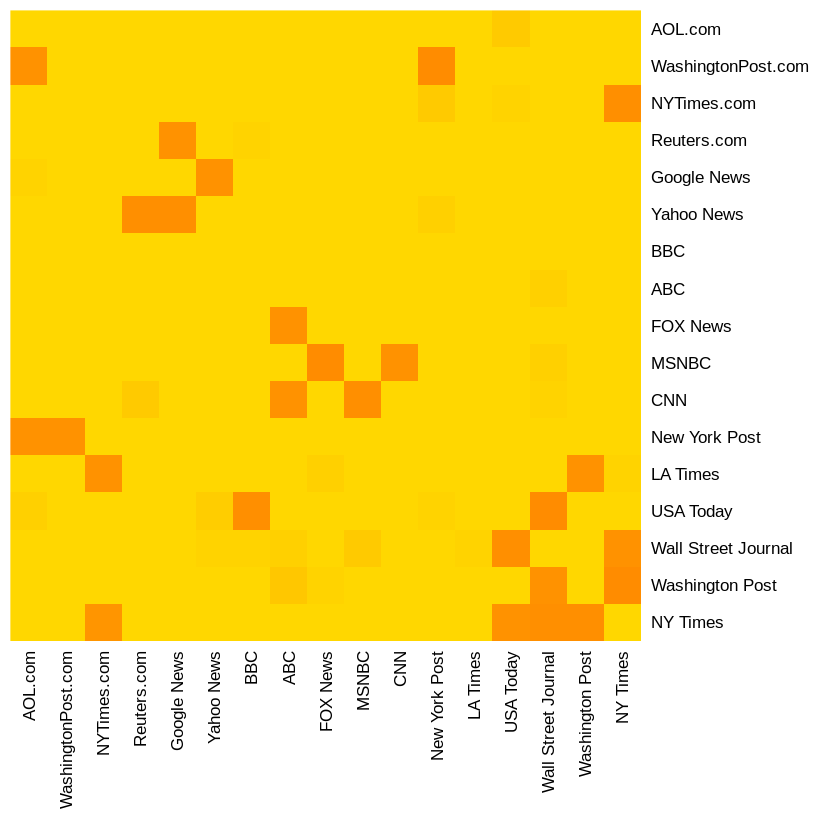

In [62]:
netm <- get.adjacency(net, attr="weight", sparse=F)
colnames(netm) <- V(net)$media
rownames(netm) <- V(net)$media

palf <- colorRampPalette(c("gold", "dark orange")) 
heatmap(netm[,17:1], Rowv = NA, Colv = NA, col = palf(100), 
        scale="none", margins=c(10,10) )

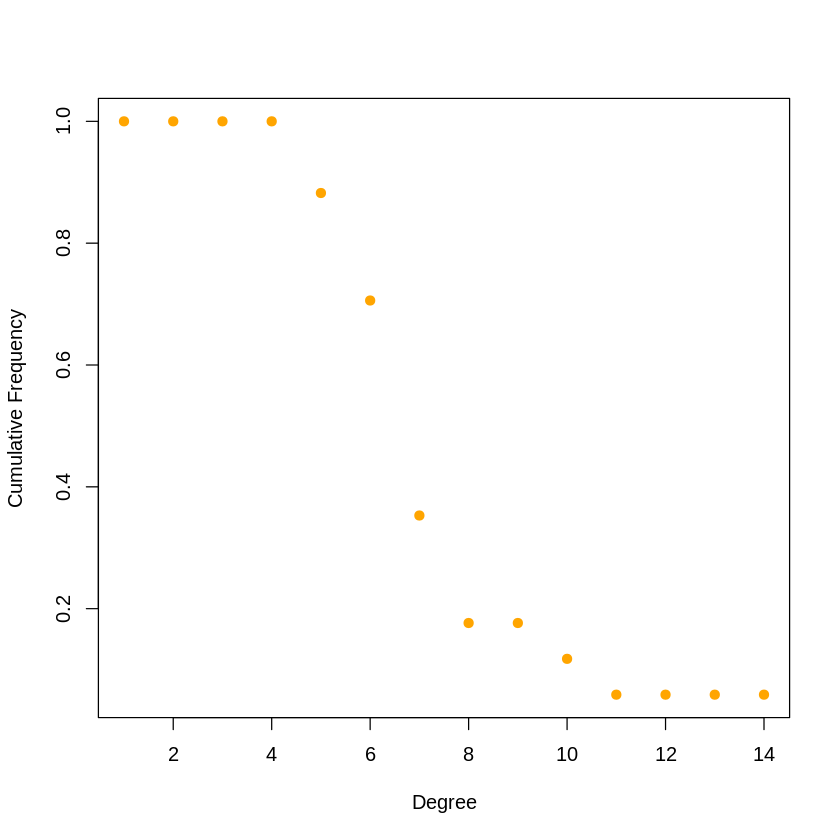

In [63]:
dd <- degree.distribution(net, cumulative=T, mode="all")
plot(dd, pch=19, cex=1, col="orange", xlab="Degree", ylab="Cumulative Frequency")

id  media   media.type media.name audience.size
1 s01 NYT     1          Newspaper  20           
2 s02 WaPo    1          Newspaper  25           
3 s03 WSJ     1          Newspaper  30           
4 s04 USAT    1          Newspaper  32           
5 s05 LATimes 1          Newspaper  20           
6 s06 CNN     2          TV         56

U01 U02 U03 U04 U05 U06 U07 U08 U09 U10 U11 U12 U13 U14 U15 U16 U17 U18 U19
s01 1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
s02 0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
s03 0   0   0   0   0   1   1   1   1   0   0   0   0   0   0   0   0   0   0  
s04 0   0   0   0   0   0   0   0   1   1   1   0   0   0   0   0   0   0   0  
s05 0   0   0   0   0   0   0   0   0   0   1   1   1   0   0   0   0   0   0  
s06 0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   1   0   0  
    U20
s01 0  
s02 1  
s03 0  
s04 0  
s05 0  
s06 0

< table of extent 0 >

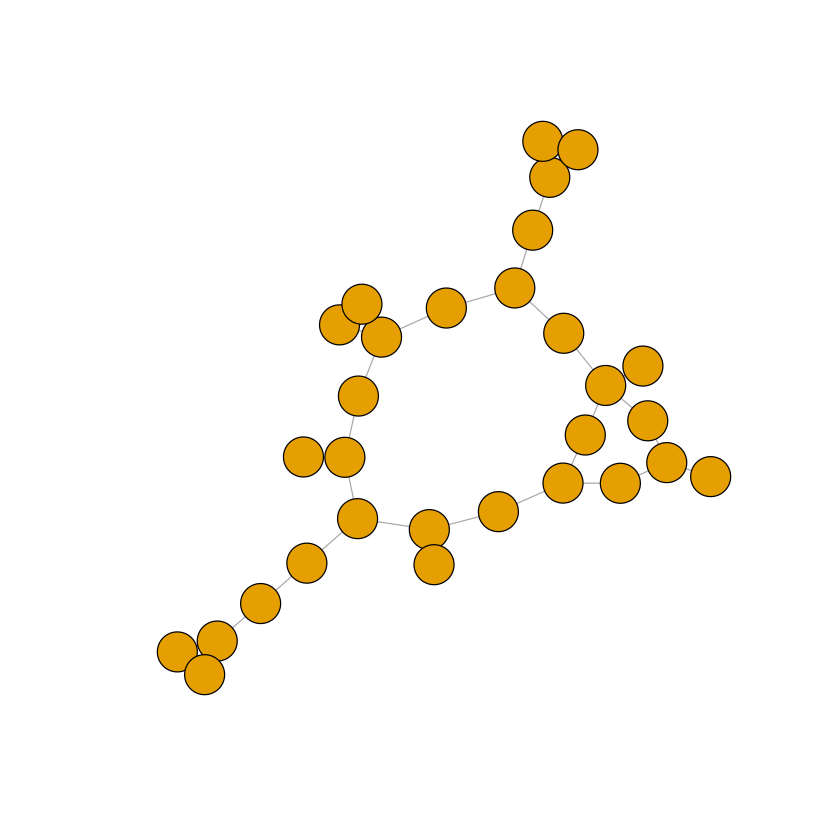

In [64]:
head(nodes2)
head(links2)

net2 <- graph.incidence(links2)
table(E(net2)$type)

plot(net2, vertex.label=NA)

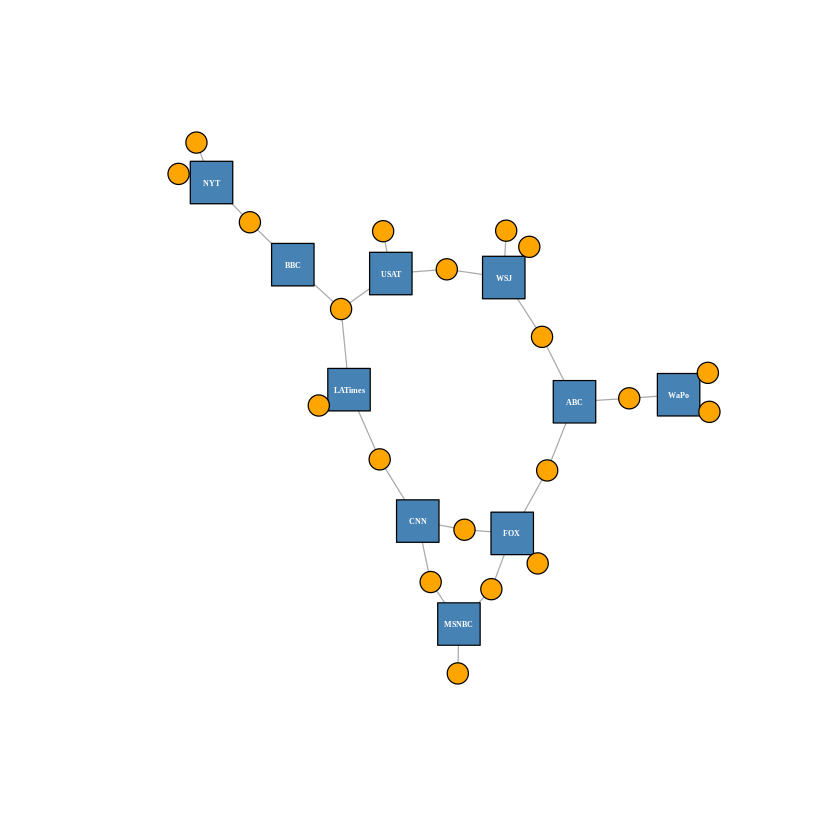

In [65]:
V(net2)$color <- c("steel blue", "orange")[V(net2)$type+1]
V(net2)$shape <- c("square", "circle")[V(net2)$type+1]
V(net2)$label <- ""
V(net2)$label[V(net2)$type==F] <- nodes2$media[V(net2)$type==F] 
V(net2)$label.cex=.4
V(net2)$label.font=2

plot(net2, vertex.label.color="white", vertex.size=(2-V(net2)$type)*8) 

In [66]:
plot(net2, vertex.label=NA, vertex.size=7, layout=layout.bipartite) 

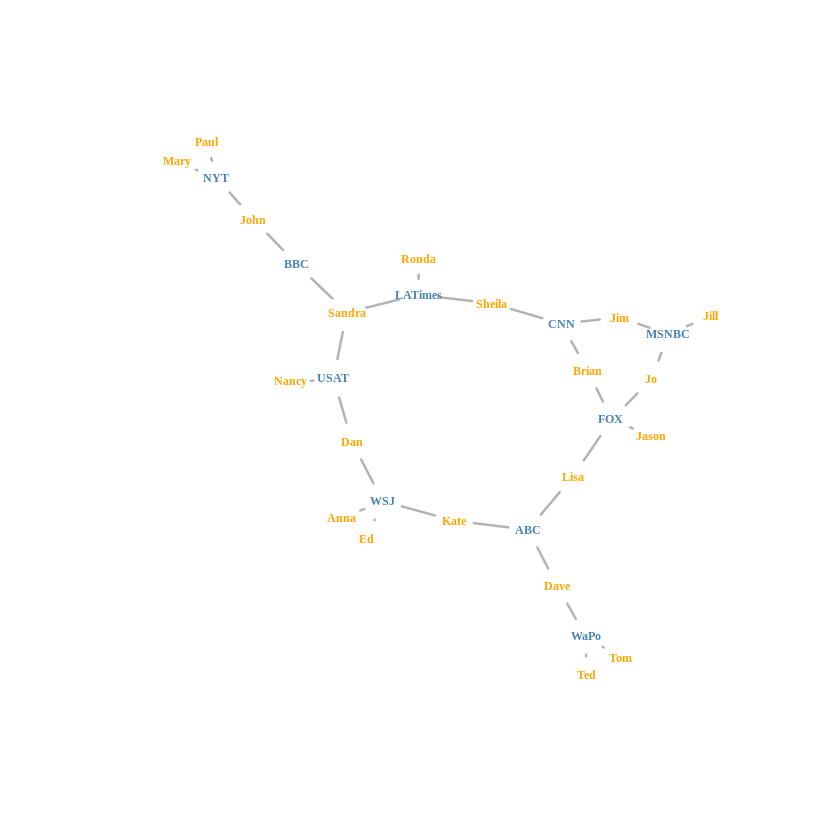

In [67]:
plot(net2, vertex.shape="none", vertex.label=nodes2$media,
     vertex.label.color=V(net2)$color, vertex.label.font=2, 
     vertex.label.cex=.6, edge.color="gray70",  edge.width=2)

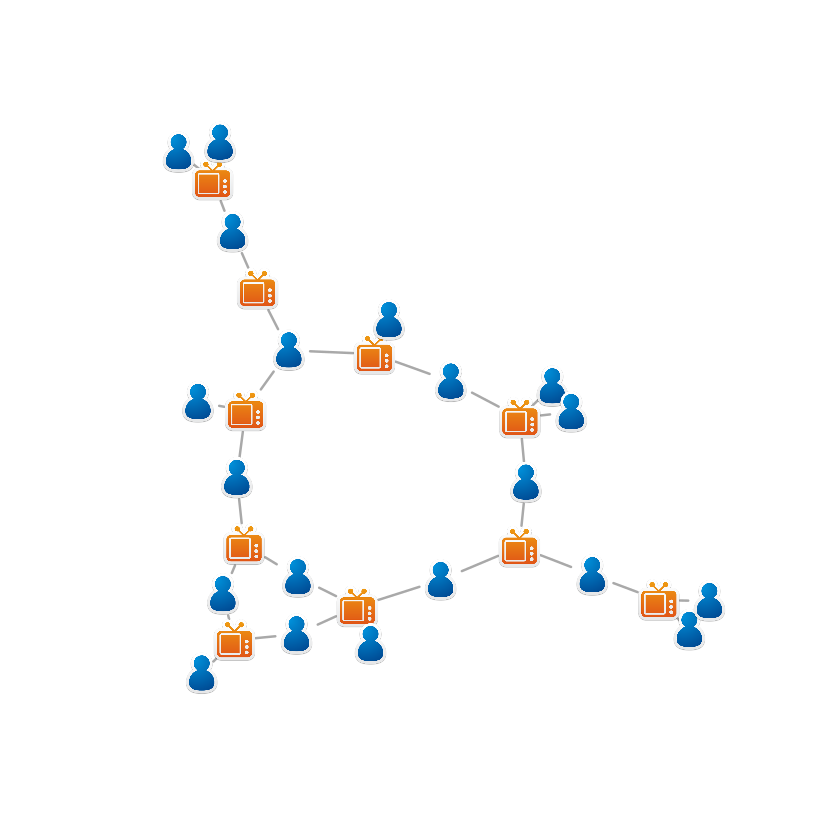

In [72]:
library(png)
 
img.1 <- readPNG("./Images/news.png")
img.2 <- readPNG("./Images/user.png")

V(net2)$raster <- list(img.1, img.2)[V(net2)$type+1]

plot(net2, vertex.shape="raster", vertex.label=NA,
     vertex.size=16, vertex.size2=16, edge.width=2)

In [74]:
l <- layout.auto(net2, ymin=-1.5, ymax=1.5, xmin=-1.5, xmax=1.5)

plot(net2, vertex.shape="raster", vertex.label=NA,
     vertex.size=16, vertex.size2=16, edge.width=2, layout=l)

img.3 <- readPNG("./Images/puppy.png")
rasterImage(img.3,  xleft=-1.7, xright=0, ybottom=-1.2, ytop=0)

ERROR: Error in layout_with_fr(graph, dim = dim, ...): unused arguments (ymin = -1.5, ymax = 1.5, xmin = -1.5, xmax = 1.5)


In [75]:
detach(package:png) 
detach(package:igraph)

In [76]:
library(network)

net3 <- network(links,  vertex.attr=nodes, matrix.type="edgelist", 
                loops=F, multiple=F, ignore.eval = F)

network: Classes for Relational Data
Version 1.13.0.1 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



In [77]:
net3[,]
net3 %n% "net.name" <- "Media Network" #  network attribute
net3 %v% "media"    # Node attribute
net3 %e% "type"     # Node attribute

s01 s02 s03 s04 s05 s06 s07 s08 s09 s10 s11 s12 s13 s14 s15 s16 s17
s01 0   1   1   1   0   0   0   0   0   0   0   0   0   0   1   0   0  
s02 1   0   1   0   0   0   0   0   1   1   0   0   0   0   0   0   0  
s03 1   0   0   1   1   0   0   1   0   1   1   1   0   0   0   0   0  
s04 0   0   1   0   0   1   0   0   0   0   1   1   0   0   0   0   1  
s05 1   1   0   0   0   0   0   0   1   0   0   0   0   0   1   0   0  
s06 0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1   1  
s07 0   0   1   0   0   0   0   1   0   1   0   0   0   1   0   0   0  
s08 0   0   1   0   0   0   1   0   1   0   0   0   0   0   0   0   0  
s09 0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0  
s10 0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
s11 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
s12 0   0   0   0   0   1   0   0   0   0   0   0   1   1   0   0   0  
s13 0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1  
s14 0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   0  
s15 1   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0  
s16 0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1  
s17 0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0

[1] "NY Times"            "Washington Post"     "Wall Street Journal"
 [4] "USA Today"           "LA Times"            "New York Post"      
 [7] "CNN"                 "MSNBC"               "FOX News"           
[10] "ABC"                 "BBC"                 "Yahoo News"         
[13] "Google News"         "Reuters.com"         "NYTimes.com"        
[16] "WashingtonPost.com"  "AOL.com"

[1] "hyperlink" "hyperlink" "hyperlink" "mention"   "hyperlink" "hyperlink"
 [7] "hyperlink" "hyperlink" "hyperlink" "hyperlink" "hyperlink" "hyperlink"
[13] "mention"   "hyperlink" "hyperlink" "hyperlink" "mention"   "mention"  
[19] "hyperlink" "mention"   "mention"   "hyperlink" "hyperlink" "mention"  
[25] "hyperlink" "hyperlink" "mention"   "mention"   "mention"   "hyperlink"
[31] "mention"   "hyperlink" "mention"   "mention"   "mention"   "hyperlink"
[37] "mention"   "hyperlink" "mention"   "hyperlink" "mention"   "mention"  
[43] "mention"   "hyperlink" "hyperlink" "hyperlink" "hyperlink" "mention"  
[49] "hyperlink"

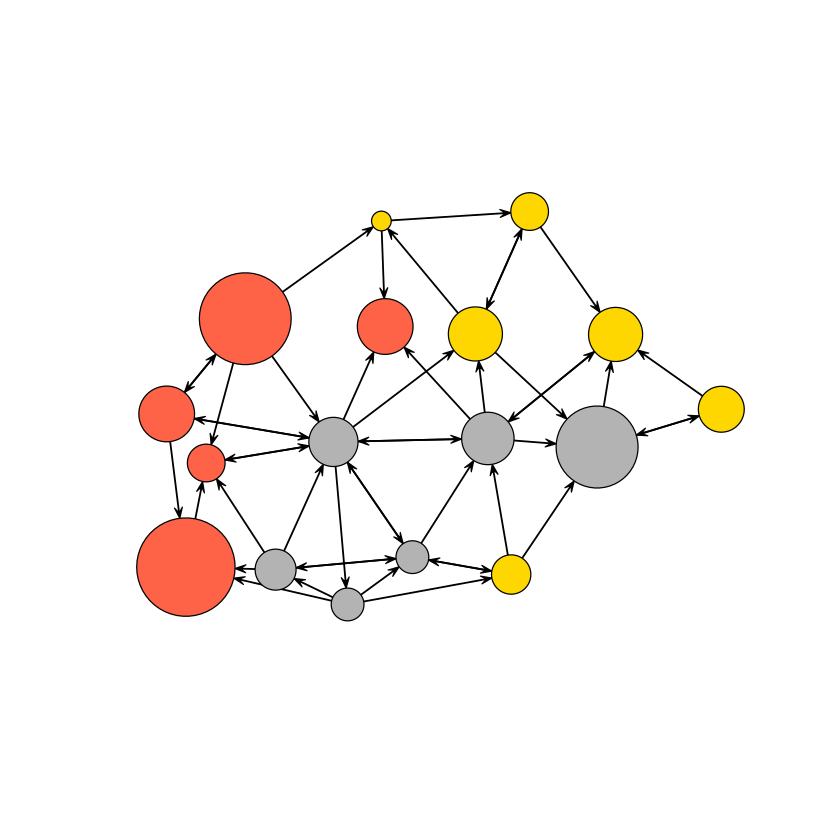

In [78]:
net3 %v% "col" <- c("gray70", "tomato", "gold")[net3 %v% "media.type"]
plot(net3, vertex.cex=(net3 %v% "audience.size")/7, vertex.col="col")

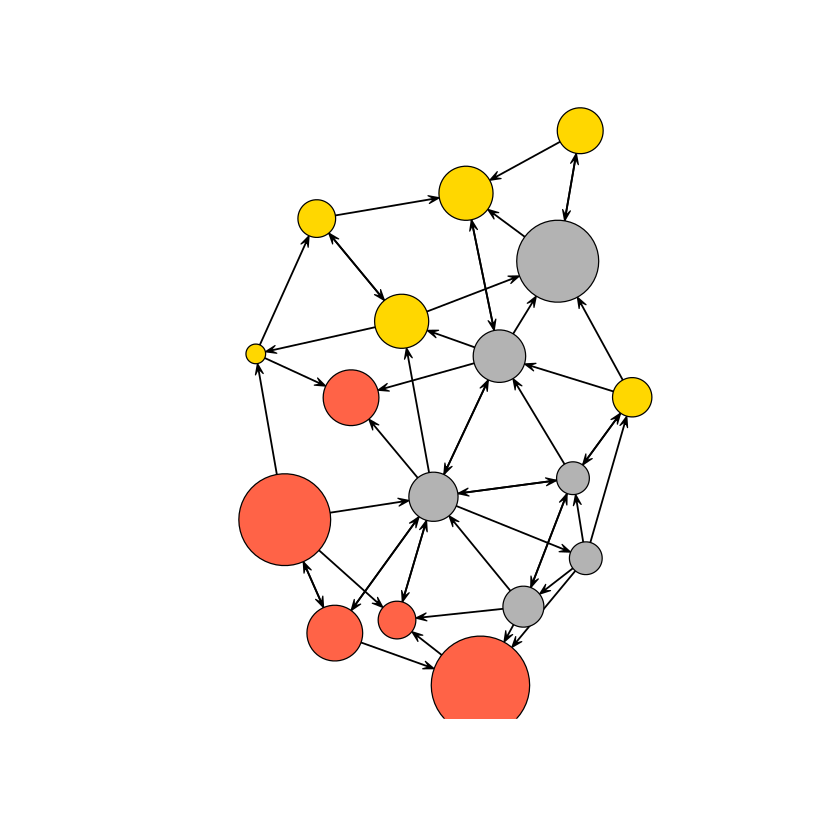

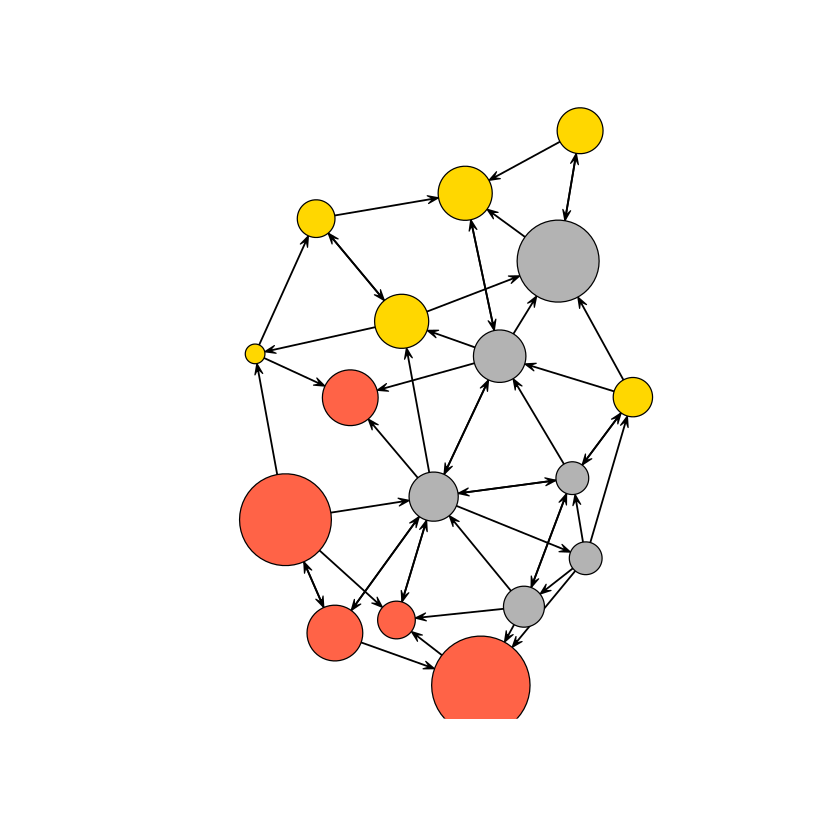

In [79]:
l <- plot(net3, vertex.cex=(net3 %v% "audience.size")/7, vertex.col="col")
plot(net3, vertex.cex=(net3 %v% "audience.size")/7, vertex.col="col", coord=l)

In [80]:
detach(package:network)

In [81]:
install.packages("networkD3")

also installing the dependency ‘htmlwidgets’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [82]:
library(networkD3)

el <- data.frame(from=as.numeric(factor(links$from))-1, 
                 to=as.numeric(factor(links$to))-1 )

In [83]:
nl <- cbind(idn=factor(nodes$media, levels=nodes$media), nodes) 

In [84]:
forceNetwork(Links = el, Nodes = nl, Source="from", Target="to",
               NodeID = "idn", Group = "type.label",linkWidth = 1,
               linkColour = "#afafaf", fontSize=12, zoom=T, legend=T,
               Nodesize=6, opacity = 0.8, charge=-300, 
               width = 600, height = 400)

HTML widgets cannot be represented in plain text (need html)

In [85]:
install.packages('animation')
library(animation) 
library(igraph)

ani.options("convert")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



NULL

In [87]:
l <- layout.fruchterman.reingold(net)

saveGIF( {  col <- rep("grey40", vcount(net))
            plot(net, vertex.color=col, layout=l)
            
            step.1 <- V(net)[media=="Wall Street Journal"]
            col[step.1] <- "#ff5100"
            plot(net, vertex.color=col, layout=l)
            
            step.2 <- unlist(neighborhood(net, 1, step.1, mode="out"))
            col[setdiff(step.2, step.1)] <- "#ff9d00"
            plot(net, vertex.color=col, layout=l) 
            
            step.3 <- unlist(neighborhood(net, 2, step.1, mode="out"))
            col[setdiff(step.3, step.2)] <- "#FFDD1F"
            plot(net, vertex.color=col, layout=l)  },
          interval = .8, movie.name="network_animation.gif" )
 
 detach(package:igraph)
 detach(package:animation)

I cannot find ImageMagick with convert = 'convert'
Warning message in im.convert(img.files, output = path.expand(movie.name), convert = convert, :
“Please install ImageMagick first or put its bin path into the system PATH variable”

[1] FALSE